<a href="https://colab.research.google.com/github/Sachinvt/ML_Bike_Sharing_Demand_Prediction_Regression/blob/main/Copy_of_ML_Bike_Sharing_Demand_Prediction_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member**     - Sachin Thorat


# **Project Summary -**


**BUSINESS PROBLEM OVERVIEW**

Urban cities are experiencing an increasing need for efficient and sustainable transportation solutions to address traffic congestion and environmental concerns. In this context, rental bikes have gained significant popularity as a cost-effective and eco-friendly mode of transportation. These bike-sharing systems provide city residents and tourists with a convenient and accessible means of commuting.

However, ensuring a stable supply of rental bikes is a complex challenge. The success of a bike-sharing system relies on predicting the demand accurately at various hours and locations, to ensure that bikes are available when and where needed. This problem statement aims to address the task of predicting bike-sharing demand, which plays a crucial role in maintaining an efficient and reliable bike-sharing system

# **GitHub Link -**

https://github.com/Sachinvt/Sachinvt/blob/main/ML_Bike_Sharing_Demand_Prediction_Project_(1).ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf

# Z score
# from scipy import stats          # was using to detect outliers


# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
#here google drive is attached to colab so that files can be accessed easily
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Bike Prediction data is stored in google drive as "SeoulBikeData.csv", path for data is stored in a variable
dataPath = "/content/drive/MyDrive/Regression/SeoulBikeData.csv"
# the variable(dataPath) is used to load data into the colab notebook using pandas
df = pd.read_csv(dataPath, encoding='ISO-8859-1')

### Dataset First View

In [4]:
# Dataset First Five rows view
#Showing top five rows of play store data
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0           -5.200           37   
1  01/12/2017                204     1           -5.500           38   
2  01/12/2017                173     2           -6.000           39   
3  01/12/2017                107     3           -6.200           40   
4  01/12/2017                 78     4           -6.000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200              2000                    -17.600   
1             0.800              2000                    -17.600   
2             1.000              2000                    -17.700   
3             0.900              2000                    -17.600   
4             2.300              2000                    -18.600   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                    0.000         0.000          0.000  Winter  No Holiday   
1                    0.000         0.000          0.000  Winter  No Holiday   
2                    0.000         0.000          0.000  Winter  No Holiday   
3                    0.000         0.000          0.000  Winter  No Holiday   
4                    0.000         0.000          0.000  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Showing Last five rows of play store data
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19            4.200           34   
8756  30/11/2018                764    20            3.400           37   
8757  30/11/2018                694    21            2.600           39   
8758  30/11/2018                712    22            2.100           41   
8759  30/11/2018                584    23            1.900           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755             2.600              1894                    -10.300   
8756             2.300              2000                     -9.900   
8757             0.300              1968                     -9.900   
8758             1.000              1859                     -9.800   
8759             1.300              1909                     -9.300   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                    0.000         0.000          0.000  Autumn   
8756                    0.000         0.000          0.000  Autumn   
8757                    0.000         0.000          0.000  Autumn   
8758                    0.000         0.000          0.000  Autumn   
8759                    0.000         0.000          0.000  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
# Get the dimensions of the DataFrame
df.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    8760
dtype: int64

**Dataset has 8760 unique value and there is no repetition.**

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?


The dataset you described contains information related to bike sharing and includes various attributes:

**Date:** The date in a year-month-day format.

**Rented_Bike_Count: **The number of bikes rented at each hour. This is the target variable you might want to predict.

**Hour:** The hour of the day, indicating the time at which the bike rentals are recorded.

**Temperature:** The temperature in Celsius at the given time.

**Humidity:** The humidity level expressed as a percentage.

**Windspeed:** The wind speed in meters per second (m/s).

**Visibility:** The visibility in meters (typically given as 10 meters).

**Dew Point Temperature:** The temperature at which air becomes saturated and dew forms, typically in Celsius.

**Solar Radiation:** Solar radiation measured in MJ/m2 (MegaJoules per square meter).

**Rainfall:** The amount of rainfall in millimeters (mm).

**Snowfall:** The amount of snowfall in centimeters (cm).

**Seasons:** A categorical variable indicating the season at the given date and time, such as Winter, Spring, Summer, or Autumn.

**Holiday:** A categorical variable indicating whether it's a holiday or not (Holiday/No holiday).

**Functional Day:** A categorical variable indicating whether it's a functional day (Functional hours) or a non-functional day (Non-Functional Hours).

Basically this dataset consist of 8760 rows and 14 columns. It also having no any duplicate or missing values. Out of 14 variables there are 4 categorical features and remaining are numerical features.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
# Showing all variables in dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
# Use the describe() method to generate summary statistics of the DataFrame.
df.describe().T

count     mean     std     min     25%      50%  \
Rented Bike Count         8760.000  704.602 644.997   0.000 191.000  504.500   
Hour                      8760.000   11.500   6.923   0.000   5.750   11.500   
Temperature(°C)           8760.000   12.883  11.945 -17.800   3.500   13.700   
Humidity(%)               8760.000   58.226  20.362   0.000  42.000   57.000   
Wind speed (m/s)          8760.000    1.725   1.036   0.000   0.900    1.500   
Visibility (10m)          8760.000 1436.826 608.299  27.000 940.000 1698.000   
Dew point temperature(°C) 8760.000    4.074  13.060 -30.600  -4.700    5.100   
Solar Radiation (MJ/m2)   8760.000    0.569   0.869   0.000   0.000    0.010   
Rainfall(mm)              8760.000    0.149   1.128   0.000   0.000    0.000   
Snowfall (cm)             8760.000    0.075   0.437   0.000   0.000    0.000   

                               75%      max  
Rented Bike Count         1065.250 3556.000  
Hour                        17.250   23.000  
Temperature(°C)             22.500   39.400  
Humidity(%)                 74.000   98.000  
Wind speed (m/s)             2.300    7.400  
Visibility (10m)          2000.000 2000.000  
Dew point temperature(°C)   14.800   27.200  
Solar Radiation (MJ/m2)      0.930    3.520  
Rainfall(mm)                 0.000   35.000  
Snowfall (cm)                0.000    8.800

### Variables Description

The dataset you described contains information related to bike sharing and includes various attributes:

**Date:** The date in a year-month-day format.

**Rented_Bike_Count:** The number of bikes rented at each hour. This is the target variable you might want to predict.

**Hour:** The hour of the day, indicating the time at which the bike rentals are recorded.

**Temperature:** The temperature in Celsius at the given time.

**Humidity:** The humidity level expressed as a percentage.

**Windspeed:** The wind speed in meters per second (m/s).

**Visibility:** The visibility in meters (typically given as 10 meters).

**Dew Point Temperature:** The temperature at which air becomes saturated and dew forms, typically in Celsius.

**Solar Radiation:** Solar radiation measured in MJ/m2 (MegaJoules per square meter).

**Rainfall:** The amount of rainfall in millimeters (mm).

**Snowfall:** The amount of snowfall in centimeters (cm).

**Seasons:** A categorical variable indicating the season at the given date and time, such as Winter, Spring, Summer, or Autumn.

**Holiday:** A categorical variable indicating whether it's a holiday or not (Holiday/No holiday).

**Functional Day:** A categorical variable indicating whether it's a functional day (Functional hours) or a non-functional day (Non-Functional Hours).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
#creating copy to keep oringal data safe
df1 = df.copy()

In [14]:
# Convert the "Date" column to datetime format, inferring the date format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [15]:
#Extracting month from date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

#Extracting year
df['year'] = df['Date'].dt.year

df.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0           -5.200           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200              2000                    -17.600   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                    0.000         0.000          0.000  Winter  No Holiday   

  Functioning Day month       day  year  
0             Yes   Jan  Thursday  2017

In [16]:
 # Calculate the total number of unique values in the specified DataFrame column
def total(df,var):
  total = len(df[var].value_counts())
  return total

In [17]:
# Create a dictionary to store the total number of unique values in specific columns of the DataFrame
total_lenght_different_column = {
    'Seasons': total(df,'Seasons'),
    'Holiday': total(df,'Holiday'),
    'Funtioning Day': total(df,'Functioning Day'),
    'month' : total(df,'month'),
    'day'   : total(df,'day'),
    'year'  : total(df,'year')
}

In [18]:
# Create a DataFrame from the dictionary with column names as index
total_df = pd.DataFrame.from_dict(total_lenght_different_column,orient='index')

In [19]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0           -5.200           37             2.200   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                    -17.600                    0.000   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day month  \
0         0.000          0.000  Winter  No Holiday             Yes   Jan   

        day  year  
0  Thursday  2017

In the provided dataset, there's a feature called "hour" which is represented as numerical values, but it actually encodes a timestamp related to the hourly intervals. This feature is a crucial component of the dataset as it helps in understanding the temporal patterns and dependencies within the data. It's important to note that this feature is not just a simple numeric value but represents the hour of the day, capturing the time of bike rentals. This timestamp-related information can be valuable for time-series analysis, as it allows us to observe how the number of rented bikes varies throughout the day and across different hours.

In [20]:
#convert the "Hour" column from a numeric data type to an object (categorical) data type.
df['Hour']=df['Hour'].astype('object')

In summary, categorical data are used to categorize or classify information into distinct groups or labels, while numerical data are expressed as numbers and can be used for mathematical calculations and quantitative analysis. Understanding the type of data you are working with is crucial for selecting appropriate data analysis techniques and statistical methods.

In [21]:
#total count of different value in
total_df.T

Seasons  Holiday  Funtioning Day  month  day  year
0        4        2               2     12    7     2


The summary of the result is that the features mentioned have a relatively low number of unique values, typically ranging from 2 to 12 different categories. This limited variability suggests that these features can be more effectively represented as categorical data rather than using them as integer data types. Converting these features into object data types or explicitly categorizing them can be beneficial for data analysis and encoding, making the data more manageable and interpretable. This conversion can enhance the efficiency and accuracy of data analysis processes.

In [22]:
# Convert the 'year' column to the object data type
df['year'] = df['year'].astype('object')

In [23]:
# Display the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Primary goal was to explore data, to identify relationship between different features to answer the question to achieve the objective of the project using univariate analysis, bivariate analysis and multivariate analysis.

In [24]:
#storing numerical feature in separate variable
num_feature = df.select_dtypes(exclude='object')
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [25]:
#storing categorial feature in separate variable
cat_feature = df.loc[:,  ~df.columns.isin(num_feature.columns.to_list())]
print(f'Categorical feature : {cat_feature.columns.to_list()}')

Categorical feature : ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'day', 'year']


# **Univariate Analysis**

In [26]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_context('poster');
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

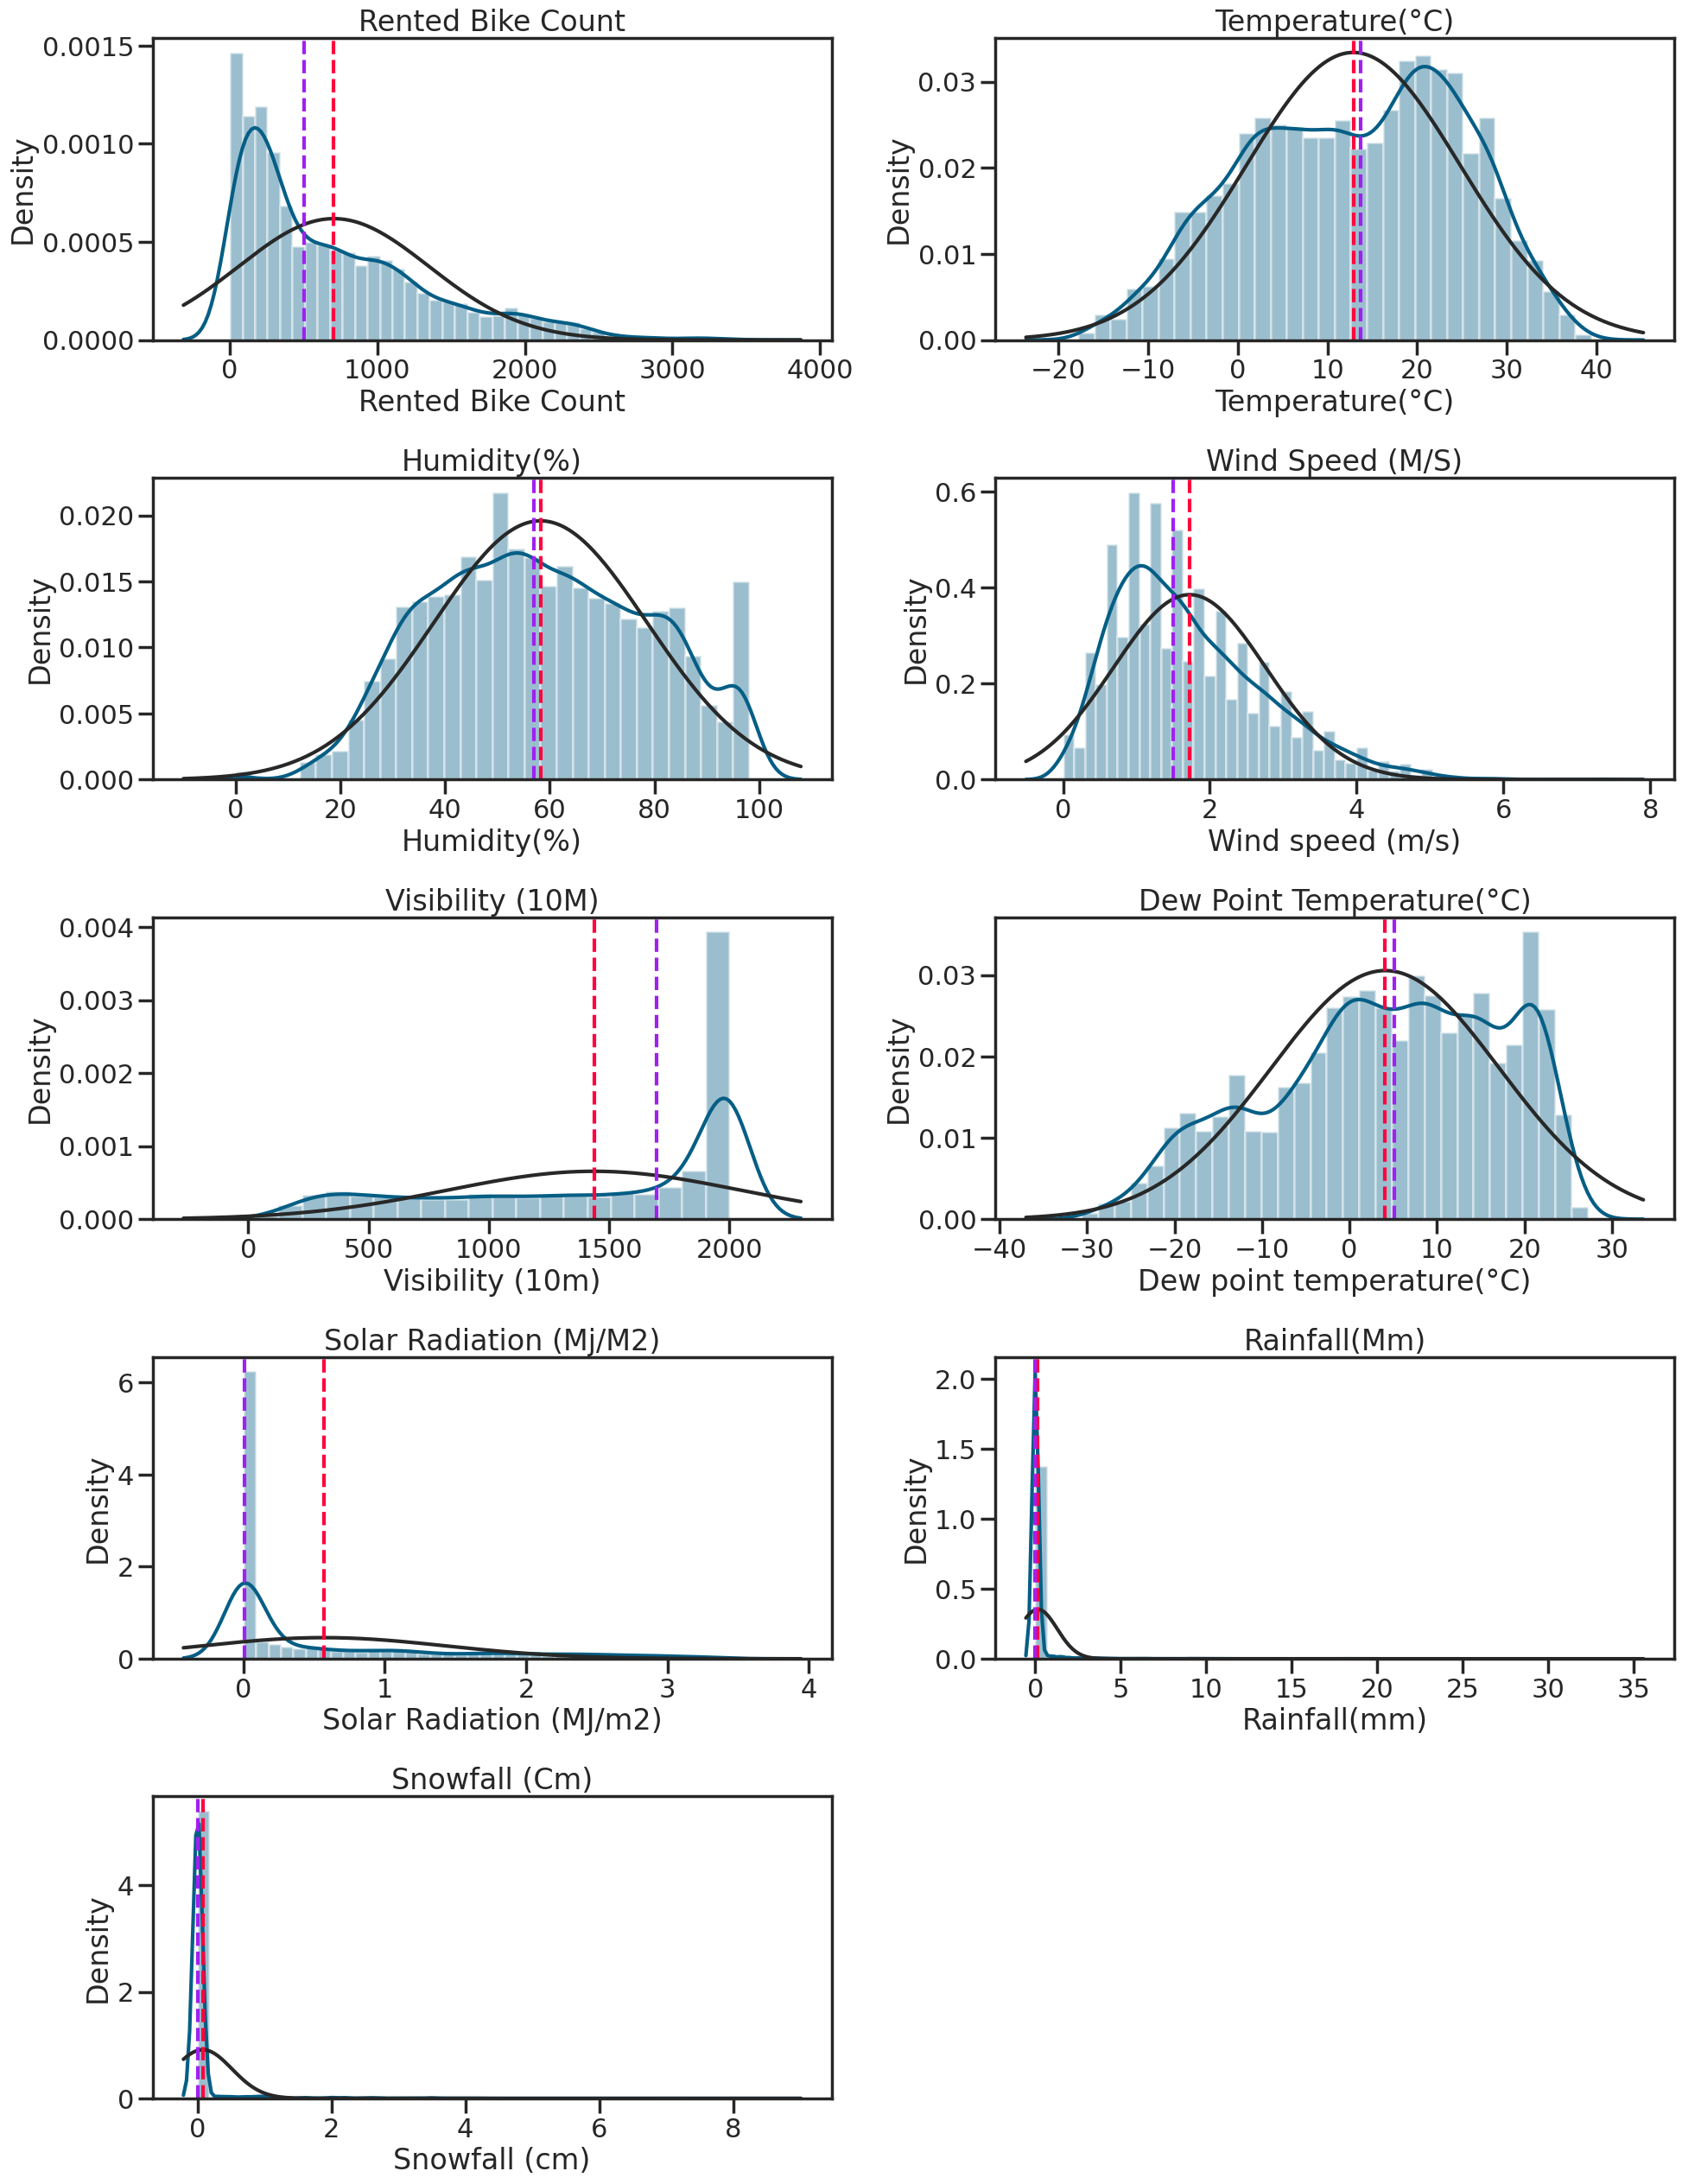

In [27]:
 density_plot(df,num_feature)

In [28]:
# Calculate skewness and kurtosis for each numerical feature in the DataFrame
df.agg(['skew', 'kurtosis']).T

skew  kurtosis
Rented Bike Count          1.153     0.853
Hour                       0.000    -1.204
Temperature(°C)           -0.198    -0.838
Humidity(%)                0.060    -0.804
Wind speed (m/s)           0.891     0.727
Visibility (10m)          -0.702    -0.962
Dew point temperature(°C) -0.367    -0.755
Solar Radiation (MJ/m2)    1.504     1.126
Rainfall(mm)              14.533   284.991
Snowfall (cm)              8.441    93.803
year                      -2.978     6.872

**skew** = measure of asymmetry of a distribution

**kurtosis** = quantify shape of a distribution

From the above table we can summarise that:

Right/Positive Skewed Distribution: Mode < Median < Mean: Rented_Bike_Count, Wind_speed, Solar Radiation

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity,Rainfall,Snowfall

Left/Negative Skewed Distribution: Mean < Median < Mode: visibility

# **Bivariate Analysis**

<Figure size 800x400 with 0 Axes>

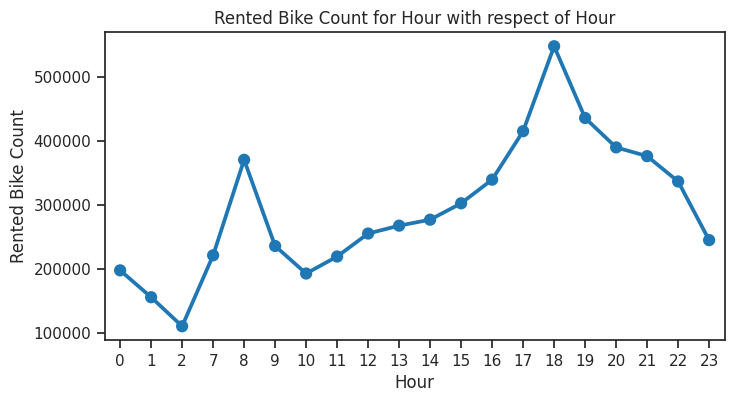

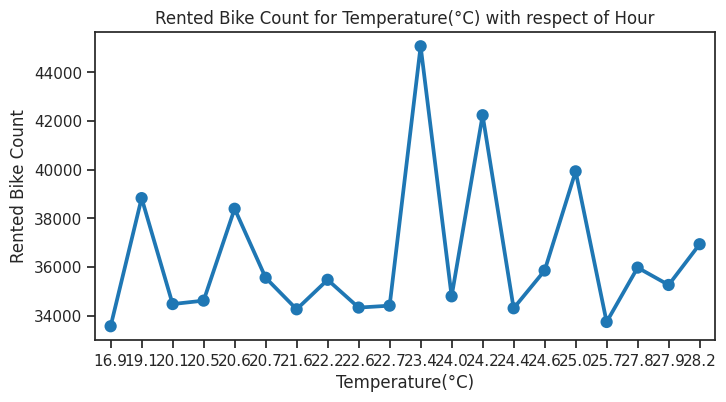

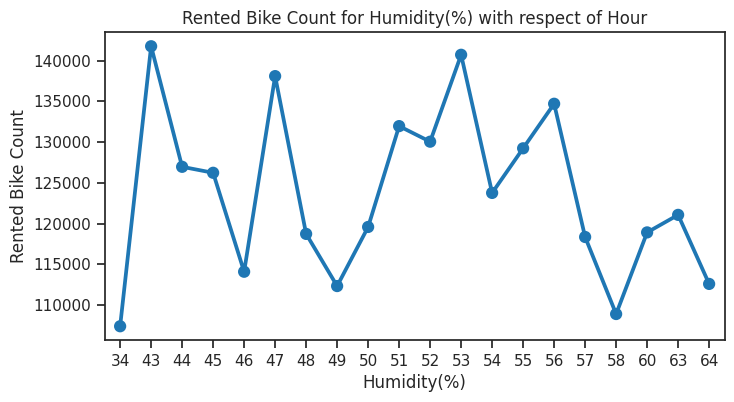

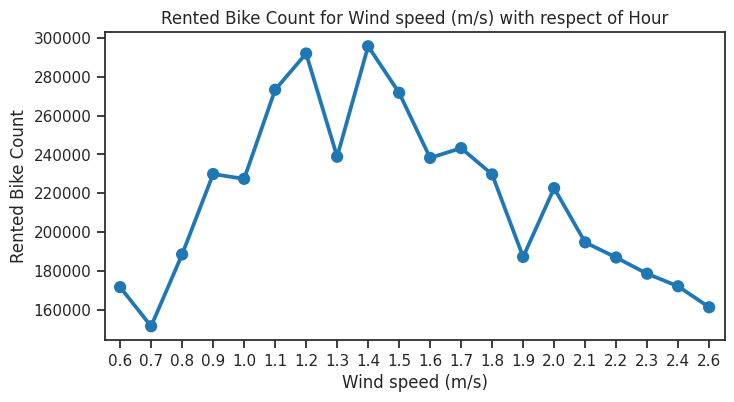

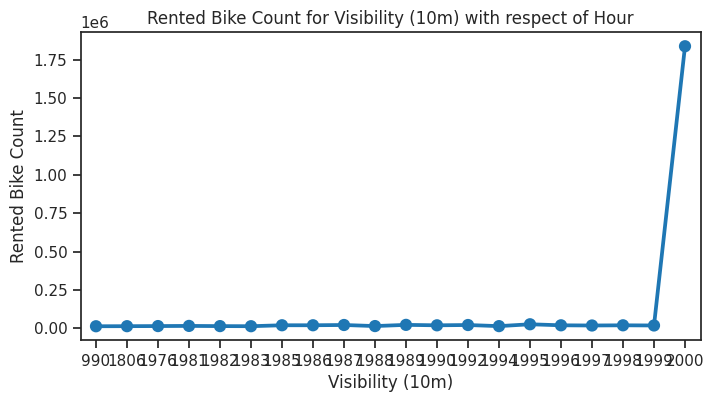

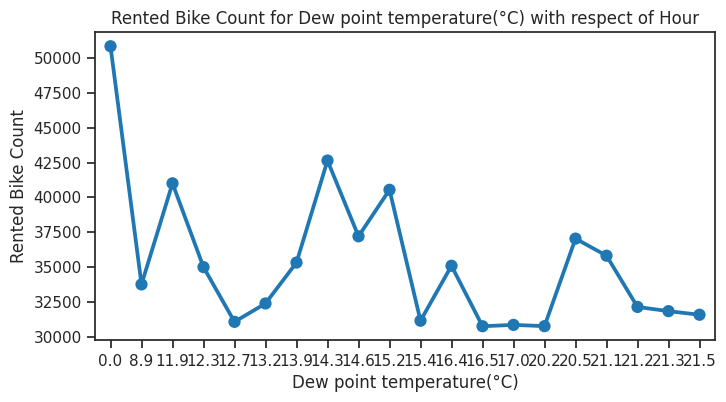

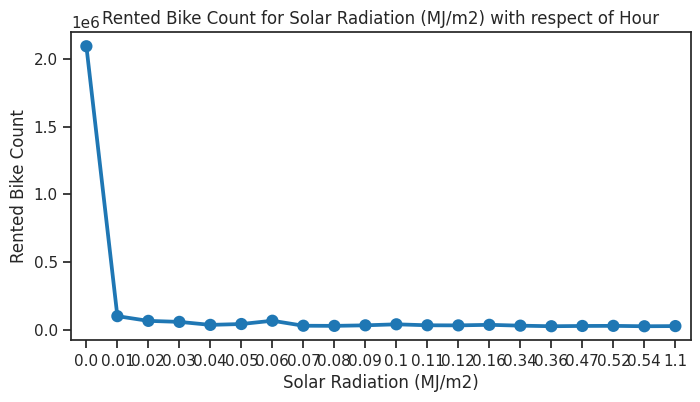

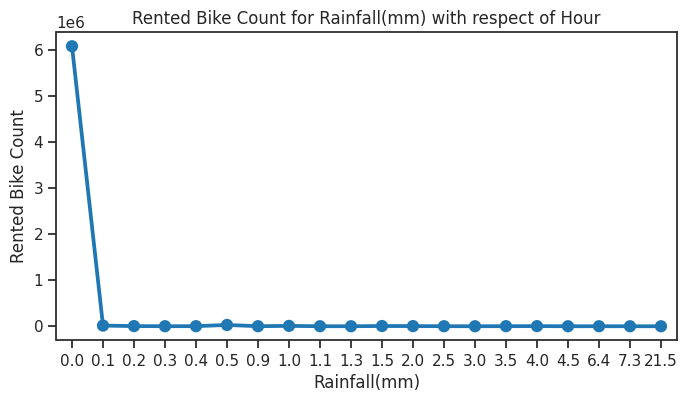

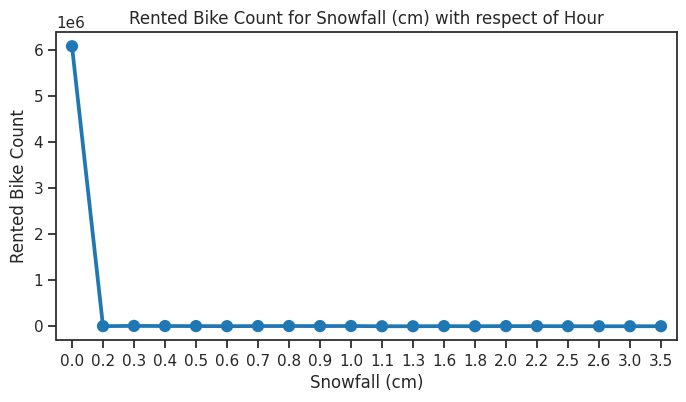

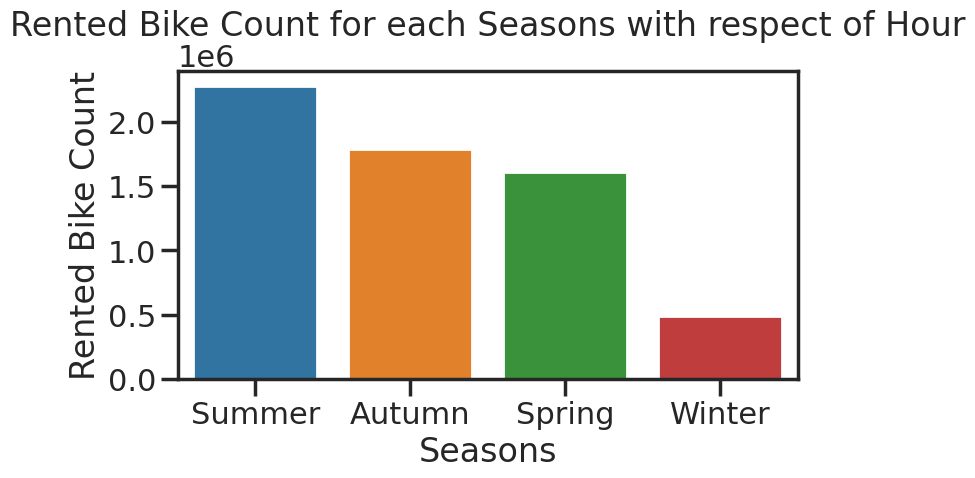

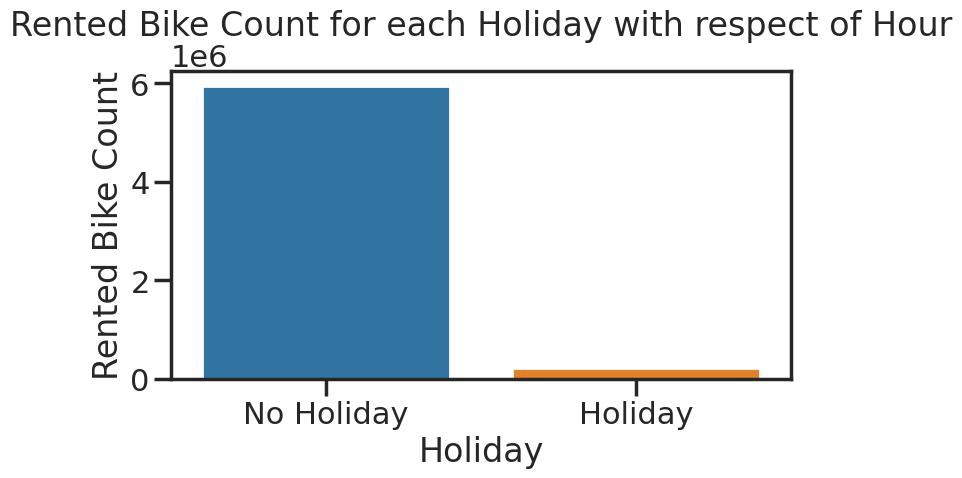

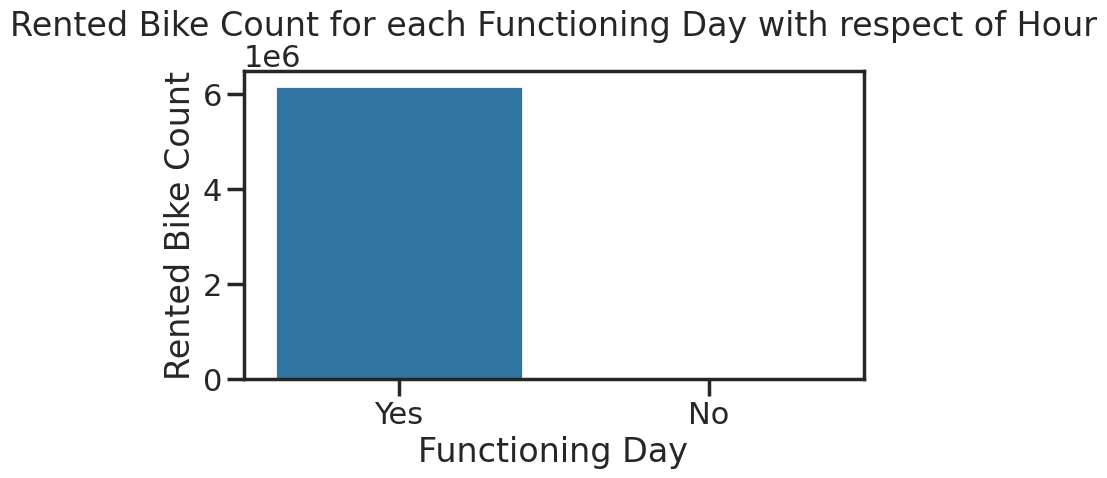

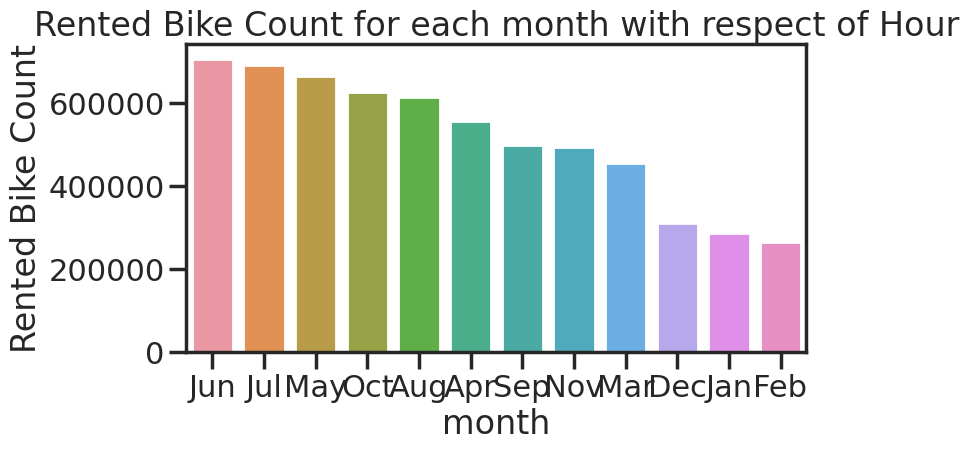

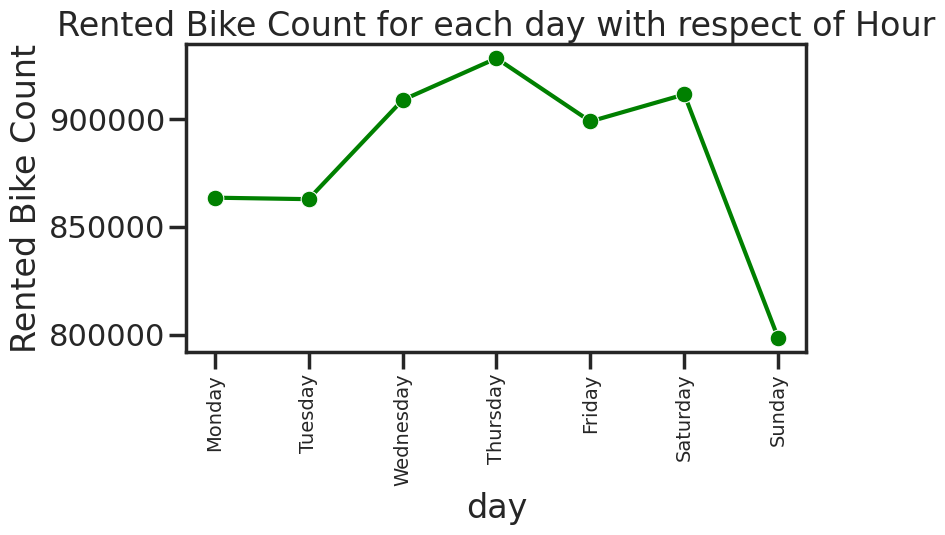

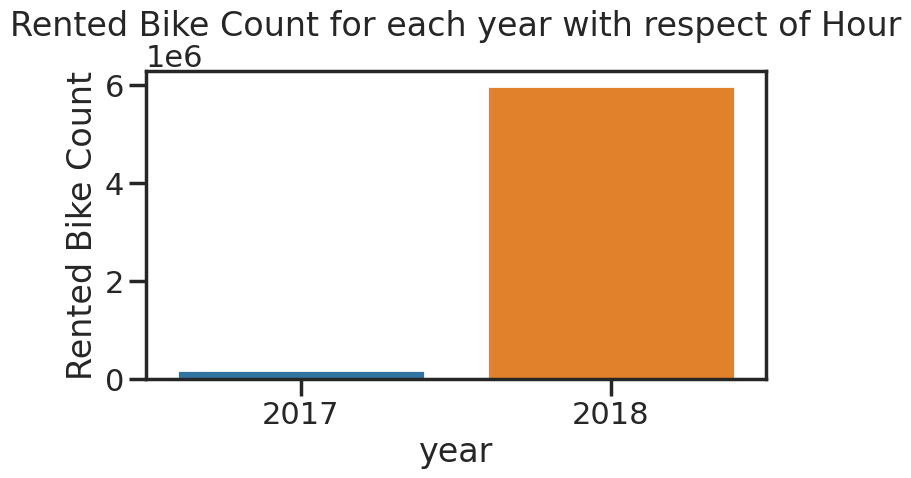

In [29]:
#comparing different feature with bike count
for i in df.columns:
  plt.figure(figsize=(8,4))
  if i == 'Rented Bike Count':
    pass
  elif i in ['Seasons','Holiday','Functioning Day','month','year']:
    grp = df.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False)
    sns.set_context('poster');
    sns.barplot(x=grp[i], y=grp["Rented Bike Count"]);
    plt.title(f"Rented Bike Count for each {i} with respect of Hour");
    print('\n')
  elif i == 'day':
    workingdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = df.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False)
    chart = workingday.merge(grp)
    sns.set_context('poster');
    sns.lineplot(data= chart, x=chart[i],y= chart['Rented Bike Count'], marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented Bike Count for each {i} with respect of Hour");
  else :
    grp = df.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False).head(20)
    sns.set_context('notebook');
    sns.pointplot(x=grp[i], y=grp["Rented Bike Count"]);
    plt.title(f"Rented Bike Count for {i} with respect of Hour");
    print('\n')

  plt.show()

For features such as "year," "Functioning_Day," "Holiday," and "Season," it's appropriate to categorize them into 2 or 4 distinct categories due to their limited unique values. This categorization would make sense for the following reasons:

**Year:** Since "year" typically represents calendar years, it naturally falls into distinct yearly categories, making it suitable for categorization.

**Functioning_Day:** "Functioning_Day" may have binary values such as "Functional" and "Non-Functional" hours, which can be effectively categorized into two separate categories.

**Holiday:** Similarly, "Holiday" often has binary values, indicating "Holiday" and "No Holiday," and can be categorized into two distinct categories.

Season: "Season" might have values representing different seasons of the year, which can be categorized into four categories: Winter, Spring, Summer, and Autumn.

In [30]:
# Define a function to group the DataFrame by a specific feature, calculate the sum of rented bike counts for each group,
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count', ascending = False)
  return data

In [31]:
#group the DataFrame by the 'Functioning Day'
group_by(df,'Functioning Day')

Functioning Day  Rented Bike Count
1             Yes            6172314
0              No                  0

In [32]:
#display the total rented bike counts for different categories within the 'Holiday' feature, sorted in descending order.
group_by(df,'Holiday')

Holiday  Rented Bike Count
1  No Holiday            5956419
0     Holiday             215895

In [33]:
# display the total rented bike counts for different years in dataset, sorted in descending order.
group_by(df,'year')

year  Rented Bike Count
1  2018            5986984
0  2017             185330

In [34]:
# group the DataFrame by the 'Seasons' feature and calculate the sum of rented bike counts for each group
group_by(df,'Seasons')

Seasons  Rented Bike Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169

In [35]:
#Create a DataFrame 'weekend' using the 'group_by' function to group data by day and sum rented bike counts
weekend = group_by(df,'day')
#Create a DataFrame 'holiday' that filters 'weekend' for 'Saturday' and 'Sunday' days
holiday = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
holiday

day  Rented Bike Count
2  Saturday             911475
3    Sunday             798295

In [36]:
# Create a DataFrame 'workingday' using the 'group_by' function to group data by day and sum rented bike counts
workingday = group_by(df, 'day')
# Create a DataFrame 'office' that filters 'workingday' to exclude 'Saturday' and 'Sunday'
office = workingday[(workingday['day'] != 'Saturday') & (workingday['day'] != 'Sunday')]
office

day  Rented Bike Count
4   Thursday             928267
6  Wednesday             908871
0     Friday             898966
1     Monday             863563
5    Tuesday             862877

In [37]:
#checking total bike rented count of workingday vs weekend
d = office['Rented Bike Count'].sum() > holiday['Rented Bike Count'].sum()
print(f' Is it true that bike rented count is more on working day? {d}')

 Is it true that bike rented count is more on working day? True


By thoroughly understanding the relationship between "Functioning Day" and bike rentals, we can make an informed decision about how to handle this feature. This analysis aids in selecting the approach that yields the best predictive performance while maintaining the integrity of the data.

In [38]:
copy_for_future = df.copy()
trial = df.copy()

In [39]:
#changing yes-1 and no-0 for calculation of correlation
trial['Functioning Day']= LabelEncoder().fit_transform(trial['Functioning Day'])

In [40]:
trial['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

The analysis of the bike-sharing dataset has yielded several key insights regarding bike demand and its relationship with various factors. First and foremost, it is evident that on non-functioning days, the Rented_Bike_Count is consistently zero. This suggests that there is no demand for bikes on days categorized as non-functioning, which is expected.

Secondly, as the seasons change from summer to winter, there is a noticeable decrease in bike demand. This trend indicates that weather conditions significantly impact bike usage, with fewer people opting for bikes in colder months.

# **Multivariate Analysis**

In [41]:
# select and extract the categorical (object) features from the DataFrame 'trial.' Categorical features are those that represent non-numeric data or labels.
cat_feature = trial.select_dtypes(include='object')

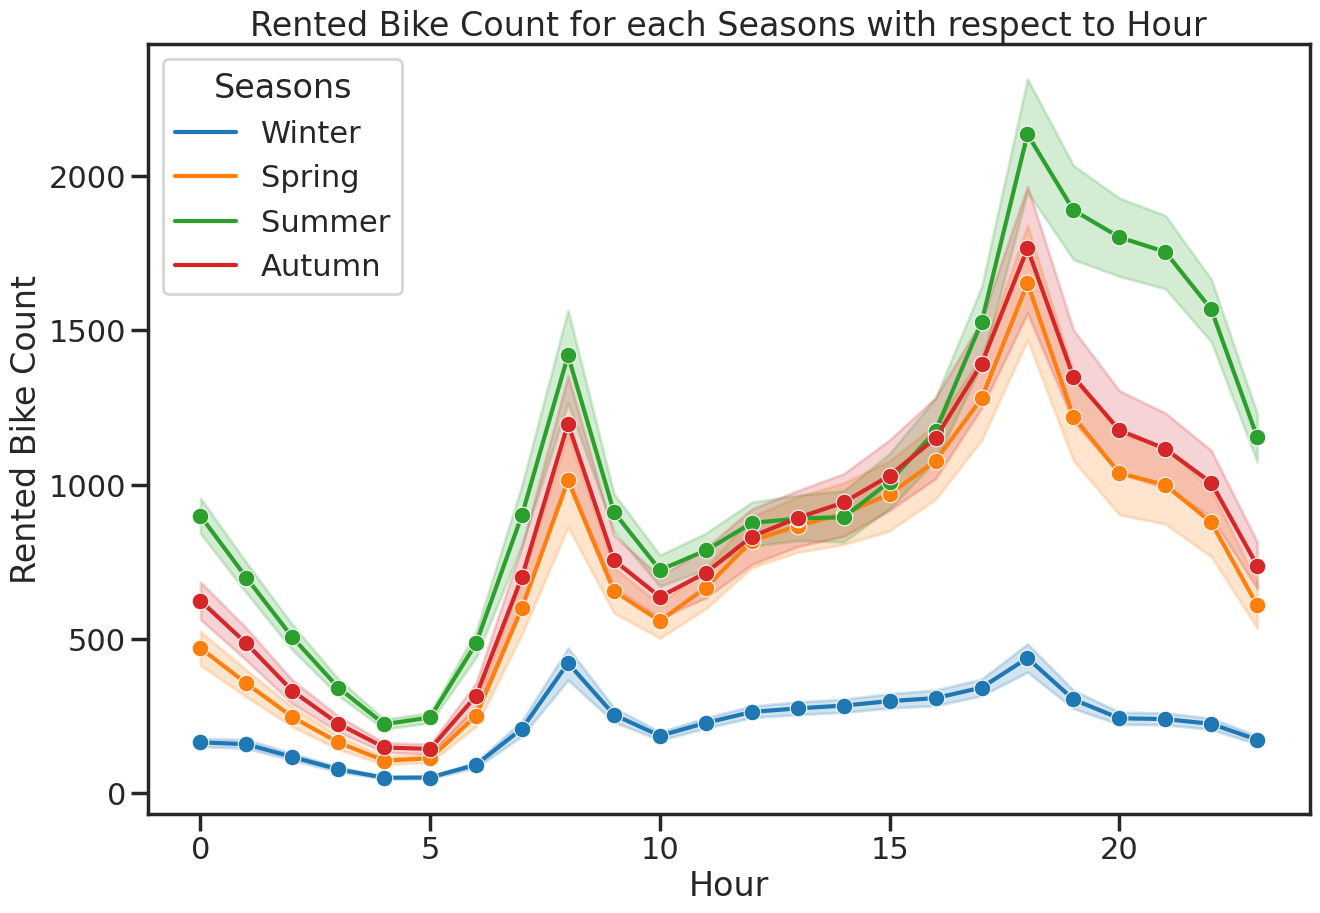

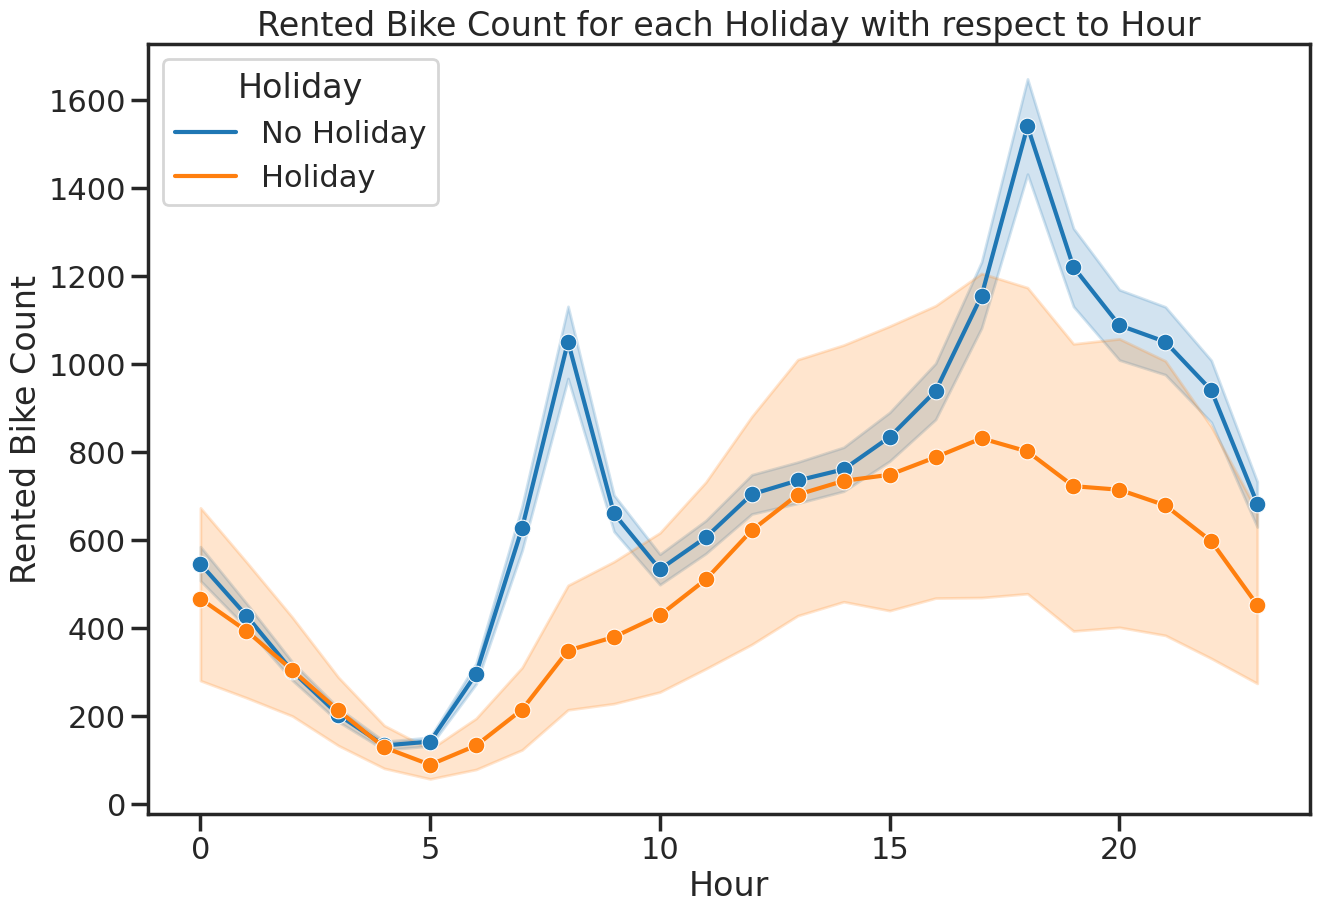

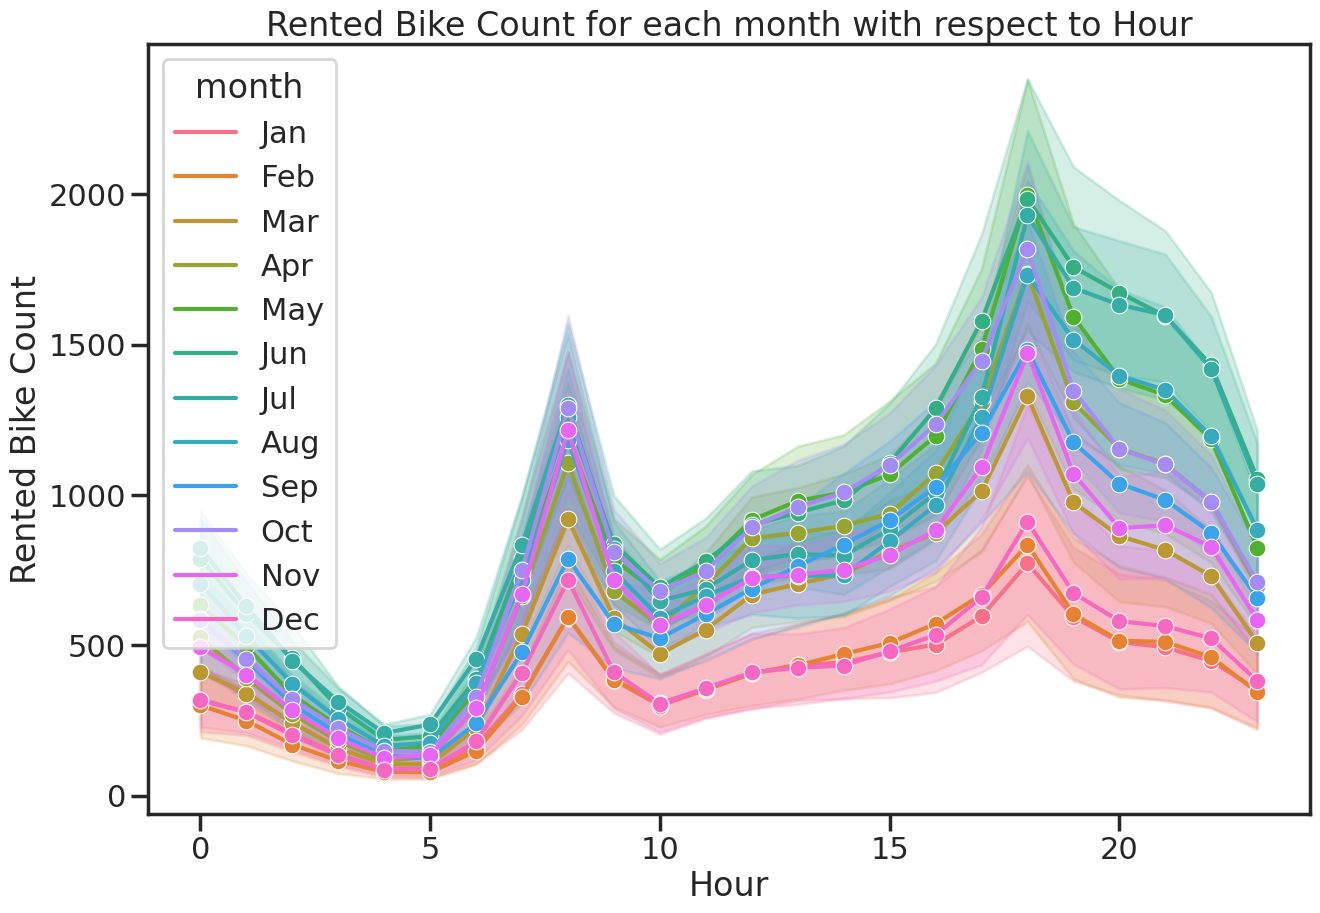

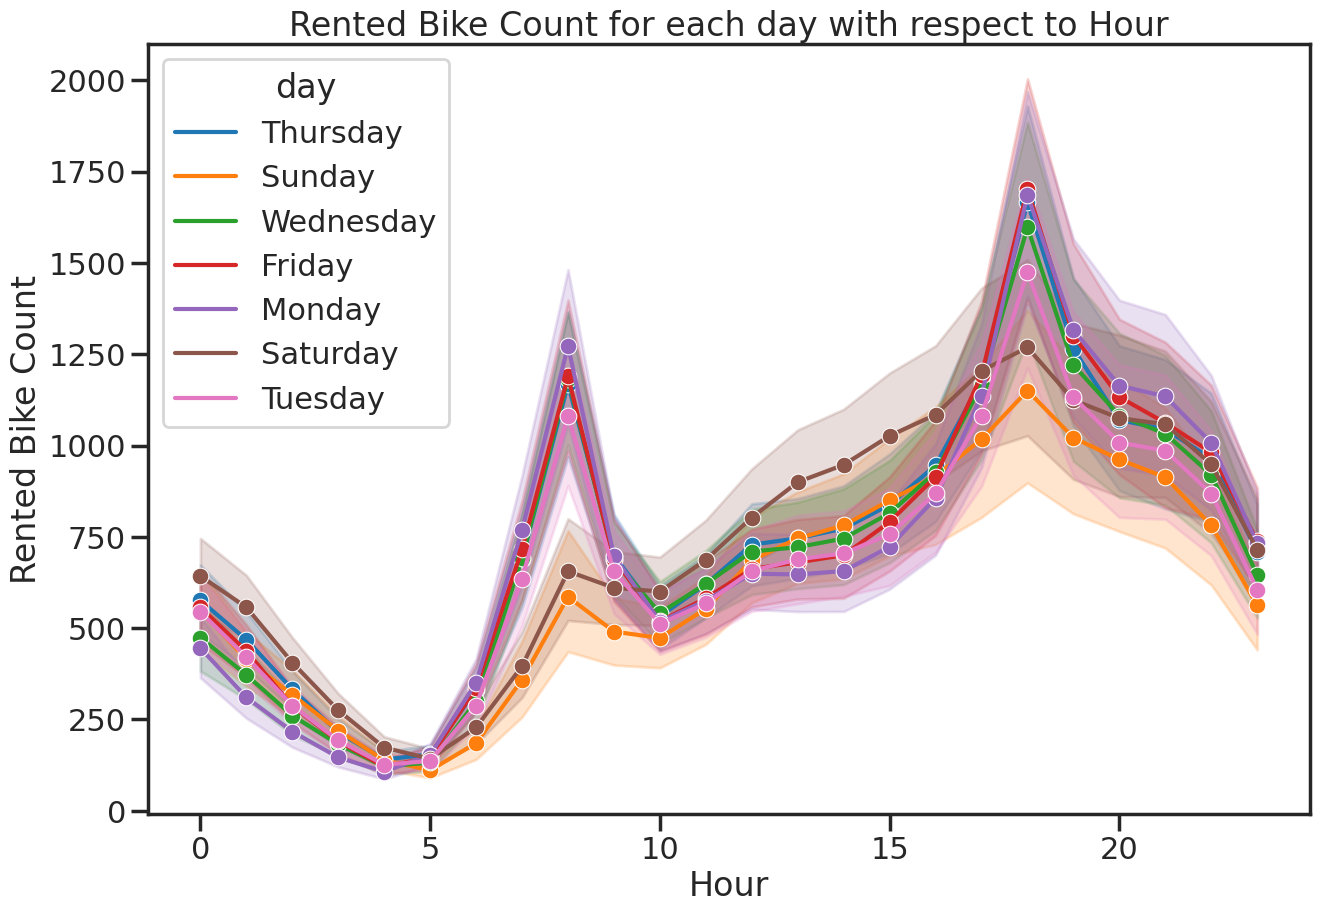

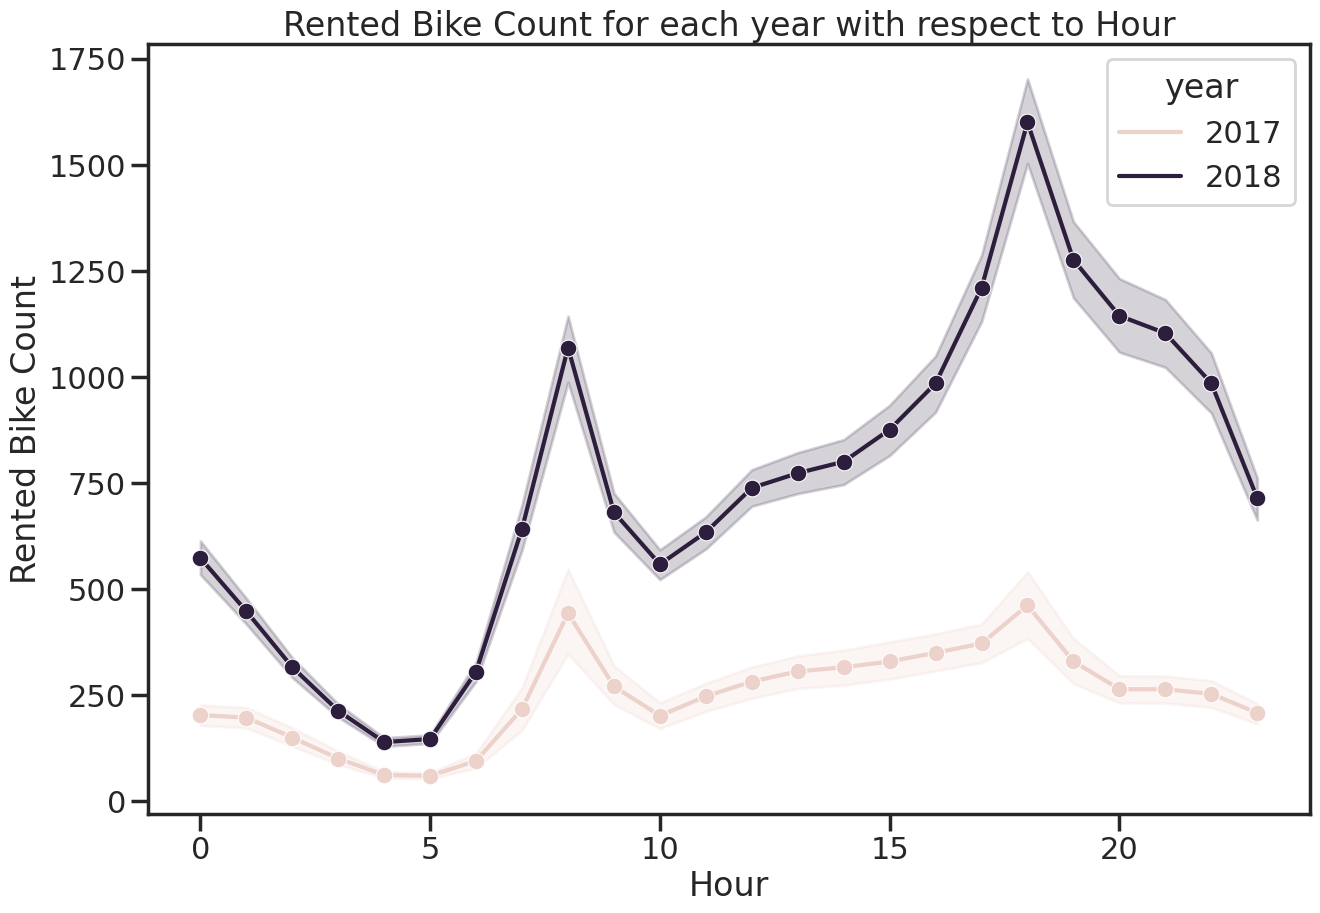

In [42]:
# Generate line plots for categorical features
for i in cat_feature:
    if i == 'Hour':
        pass
    else:
        # Create a new figure for each plot
        plt.figure(figsize=(15, 10))

        # Create a line plot to visualize "Rented Bike Count" with respect to "Hour"
        sns.lineplot(x=trial["Hour"], y=trial['Rented Bike Count'], hue=trial[i], marker='o')

        # Set the plot title
        plt.title(f"Rented Bike Count for each {i} with respect to Hour")

    # Display the plot for the current categorical feature
    plt.show()

the demand for bike rentals during different seasons is notably higher on working days compared to weekends. In other words, the dataset reveals a clear pattern where people tend to rent more bikes for their daily commute, especially during seasons, on weekdays. This observation is significant as it indicates a strong relationship between the "Seasons," "Day of the Week" (working day or weekend), and the "Rented Bike Count." This insight can be valuable for bike-sharing services, city planners, and businesses that rely on bike rentals, as it highlights the need for adequate supply and infrastructure to accommodate the increased demand on working days, particularly during specific seasons.

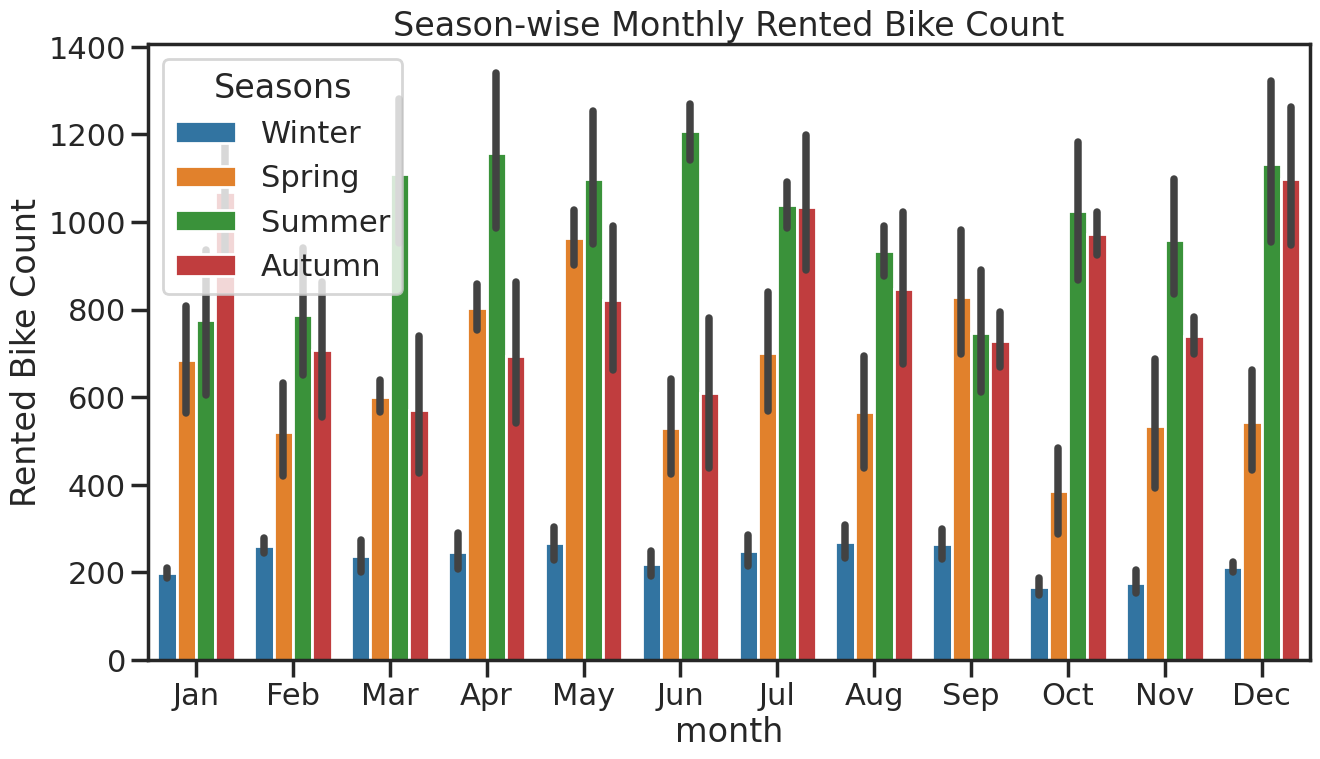

In [43]:
# Create a bar plot to visualize the season-wise monthly distribution of Rented_Bike_Count
fig, ax = plt.subplots(figsize=(15, 8))  # Create a figure and axis for the plot
sns.barplot(x='month', y='Rented Bike Count', data=trial, hue='Seasons', ax=ax)  # Generate the bar plot
ax.set_title('Season-wise Monthly Rented Bike Count')  # Set the title of the plot
plt.show()  # Display the plot

<Axes: >

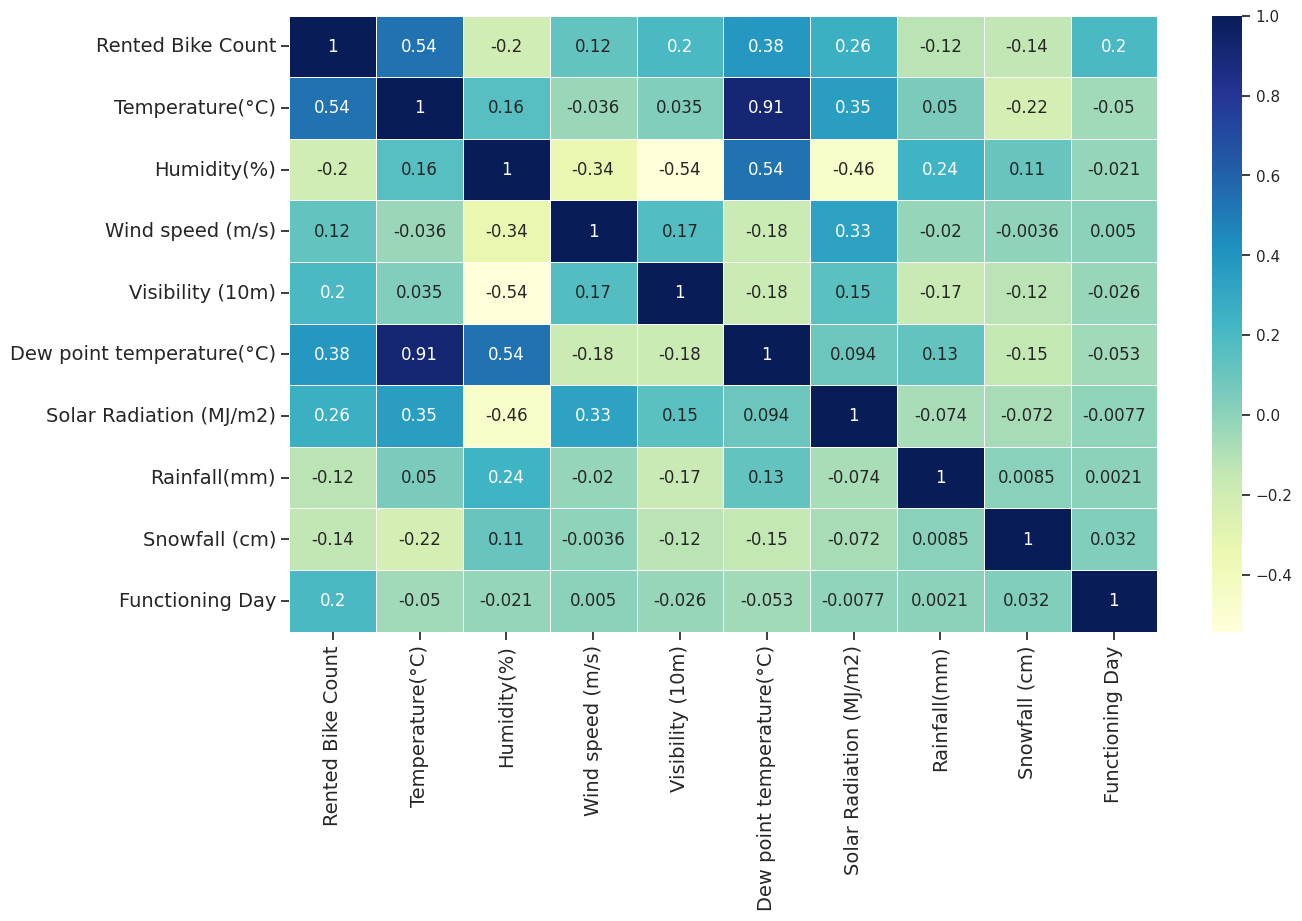

In [44]:
# Create a heatmap to visualize the correlation between multiple variables
sns.set_context('notebook')  # Set the context for the plot
plt.figure(figsize=(14, 8))  # Create a figure with a specific size
plt.xticks(fontsize=14)  # Set the x-axis label font size
plt.yticks(fontsize=14)  # Set the y-axis label font size

# Generate a heatmap of the correlation matrix with annotations, custom line width, and colormap
sns.heatmap(trial.corr(), annot=True, linewidth=0.5, cmap="YlGnBu")

In the dataset, Temperature(°C) and Dew point temperature(°C) exhibited a strong correlation. This correlation was reflected in the absolute correlation coefficient, which exceeded 0.7. A correlation coefficient above 0.7 suggests a significant linear relationship between the two variables, indicating that changes in one variable are associated with predictable changes in the other.

# **Conclusion**

**Skewness in Features:**

The features Rented_Bike_Count, Wind_speed, and Solar Radiation(MJ/m2) exhibit positive skewness. Positive skewness indicates that the data is skewed to the right, with a longer tail on the right side of the distribution. This suggests that there are occasional periods of high bike demand, possibly influenced by weather conditions like strong winds and ample solar radiation.

In contrast, the feature Visibility(10m) displays negative skewness. Negative skewness implies a left-skewed distribution, with a longer tail on the left side. This might indicate that most of the time, visibility is good (higher values), but there are occasional periods with low visibility, affecting bike demand.

**Time of High Demand:**

The analysis of the "Hour" feature indicates that the demand for bikes is highest during specific hours of the day. There are two peaks in demand, occurring around 7-9 in the morning and 6-8 in the evening. These peaks coincide with typical commuter hours when people travel to and from work, suggesting that bike sharing is a popular mode of transportation for daily commuting.

**Impact of Working Days:**

The EDA clearly shows that demand for bikes is higher on working days (i.e., weekdays) compared to weekends. This observation aligns with the idea that people use bike sharing services primarily for work-related commuting during the week. On weekends, when many people have more leisurely plans, the demand is notably lower.

**Non-Functional Days:**

Notably, during non-functional days, the demand for bikes is virtually non-existent. This emphasizes the importance of having an operational and accessible bike-sharing system on a daily basis. Non-functional days, which could be holidays or periods when the system is not operational, result in no bike rentals.

**Influence of Holidays:**

The analysis indicates that the demand for bikes is lower on holidays compared to regular working days. People tend to use alternative modes of transportation or may stay at home more during holidays, reducing the demand for bikes. This suggests that holidays have a significant impact on bike demand patterns.

**Seasonal Variation:**

Seasonal analysis reveals that the demand for bikes fluctuates with the seasons. Demand is higher during the summer months and lower during the winter months. Seasonal weather changes can significantly influence bike sharing patterns, with more favorable weather conditions in summer encouraging higher usage.


### What all manipulations have you done and insights you found?

In conclusion, the EDA of the bike sharing dataset provides a comprehensive understanding of the factors influencing bike demand. It highlights the significance of weather conditions, working days, and holidays in shaping demand patterns. Recognizing the temporal aspects of bike usage and the impact of seasons and holidays is essential for optimizing bike-sharing services, making them more efficient, and meeting the diverse needs of users. These findings offer valuable insights for bike-sharing service providers, urban planners, and policymakers in creating better, more accessible, and sustainable transportation systems.

### *** Feature Engineering & Data Pre-processing***

In [45]:
# Creating a copy of the dataset for further feature engineering
dfr=df.copy()

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(dfr.isnull().sum())

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day                          0
year                         0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments
def box_plot(df,feature):
  i=1
  for col in feature.columns :
    plt.figure(figsize = (20,18))
    plt.subplot(5,2,i);
    i=i+1
    if df[col].dtypes == 'object':
      sns.boxplot(x=df[col],y=df["Rented Bike Count"]);
      print('\n')
    else:
      sns.boxplot(df[col]);
      print('\n')
    plt.xticks(fontsize = 18, rotation = 90);
    plt.tight_layout();

In [48]:
# Select categorical (object) features in the DataFrame
cat_feature = df.select_dtypes(include ='object')

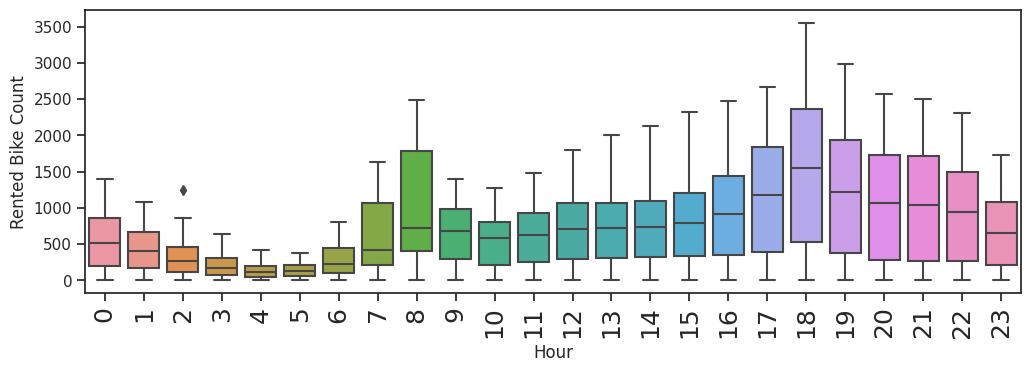

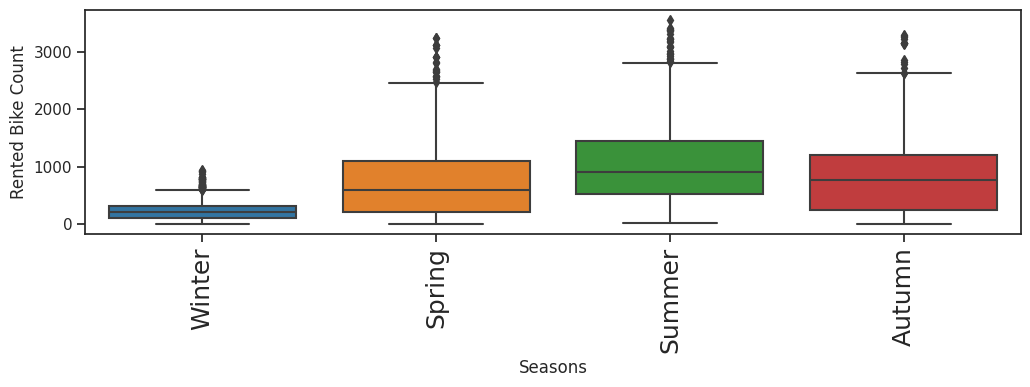

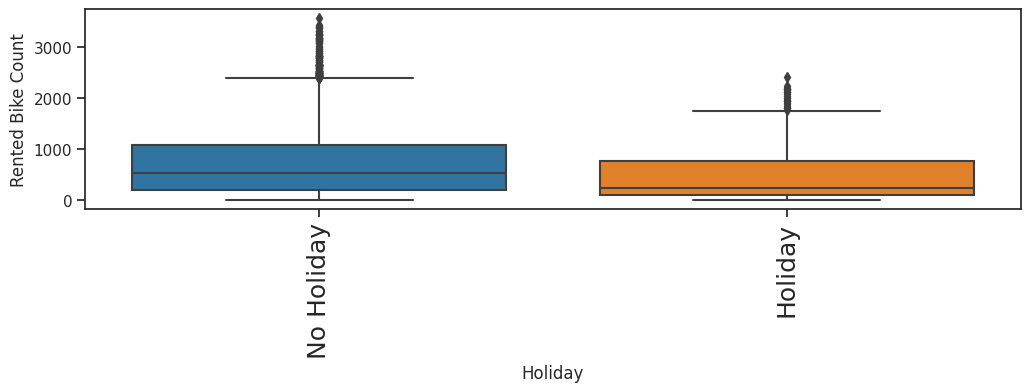

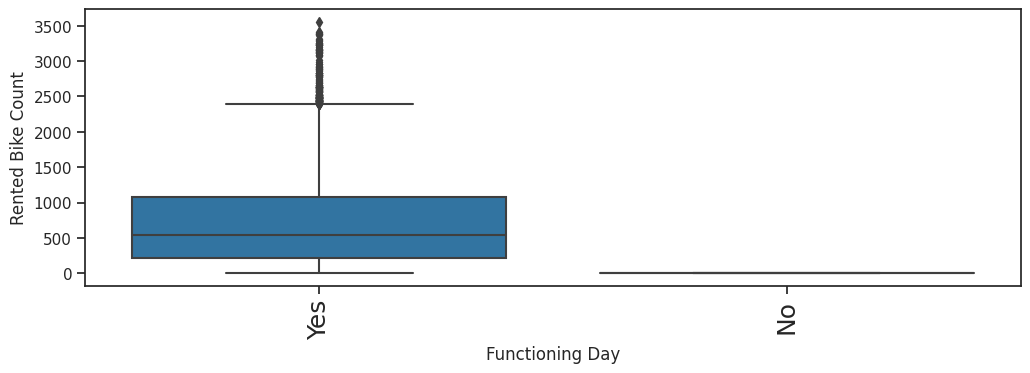

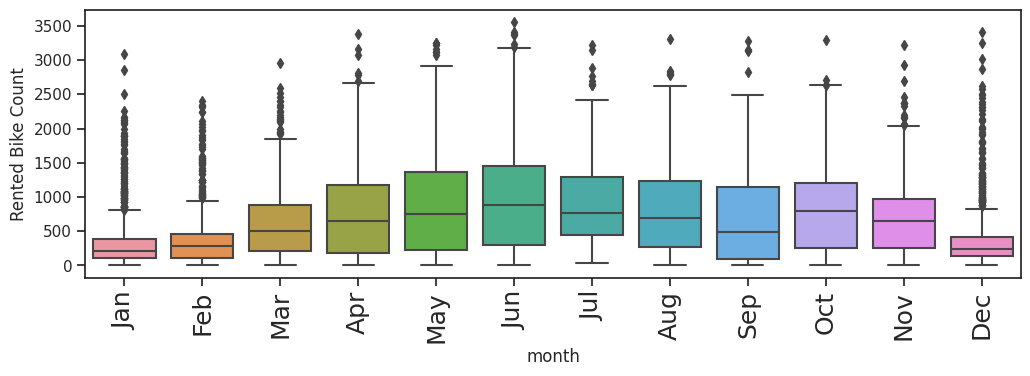

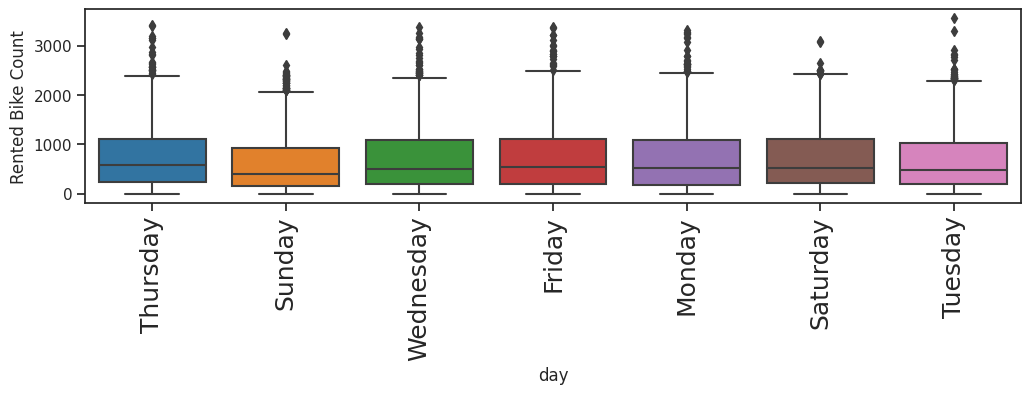

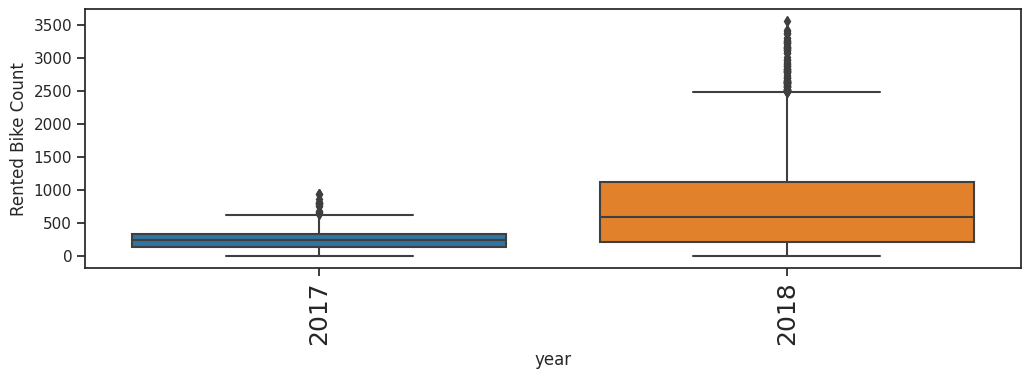

In [49]:
# Create box plots for categorical features in the DataFrame
box_plot(df,cat_feature)

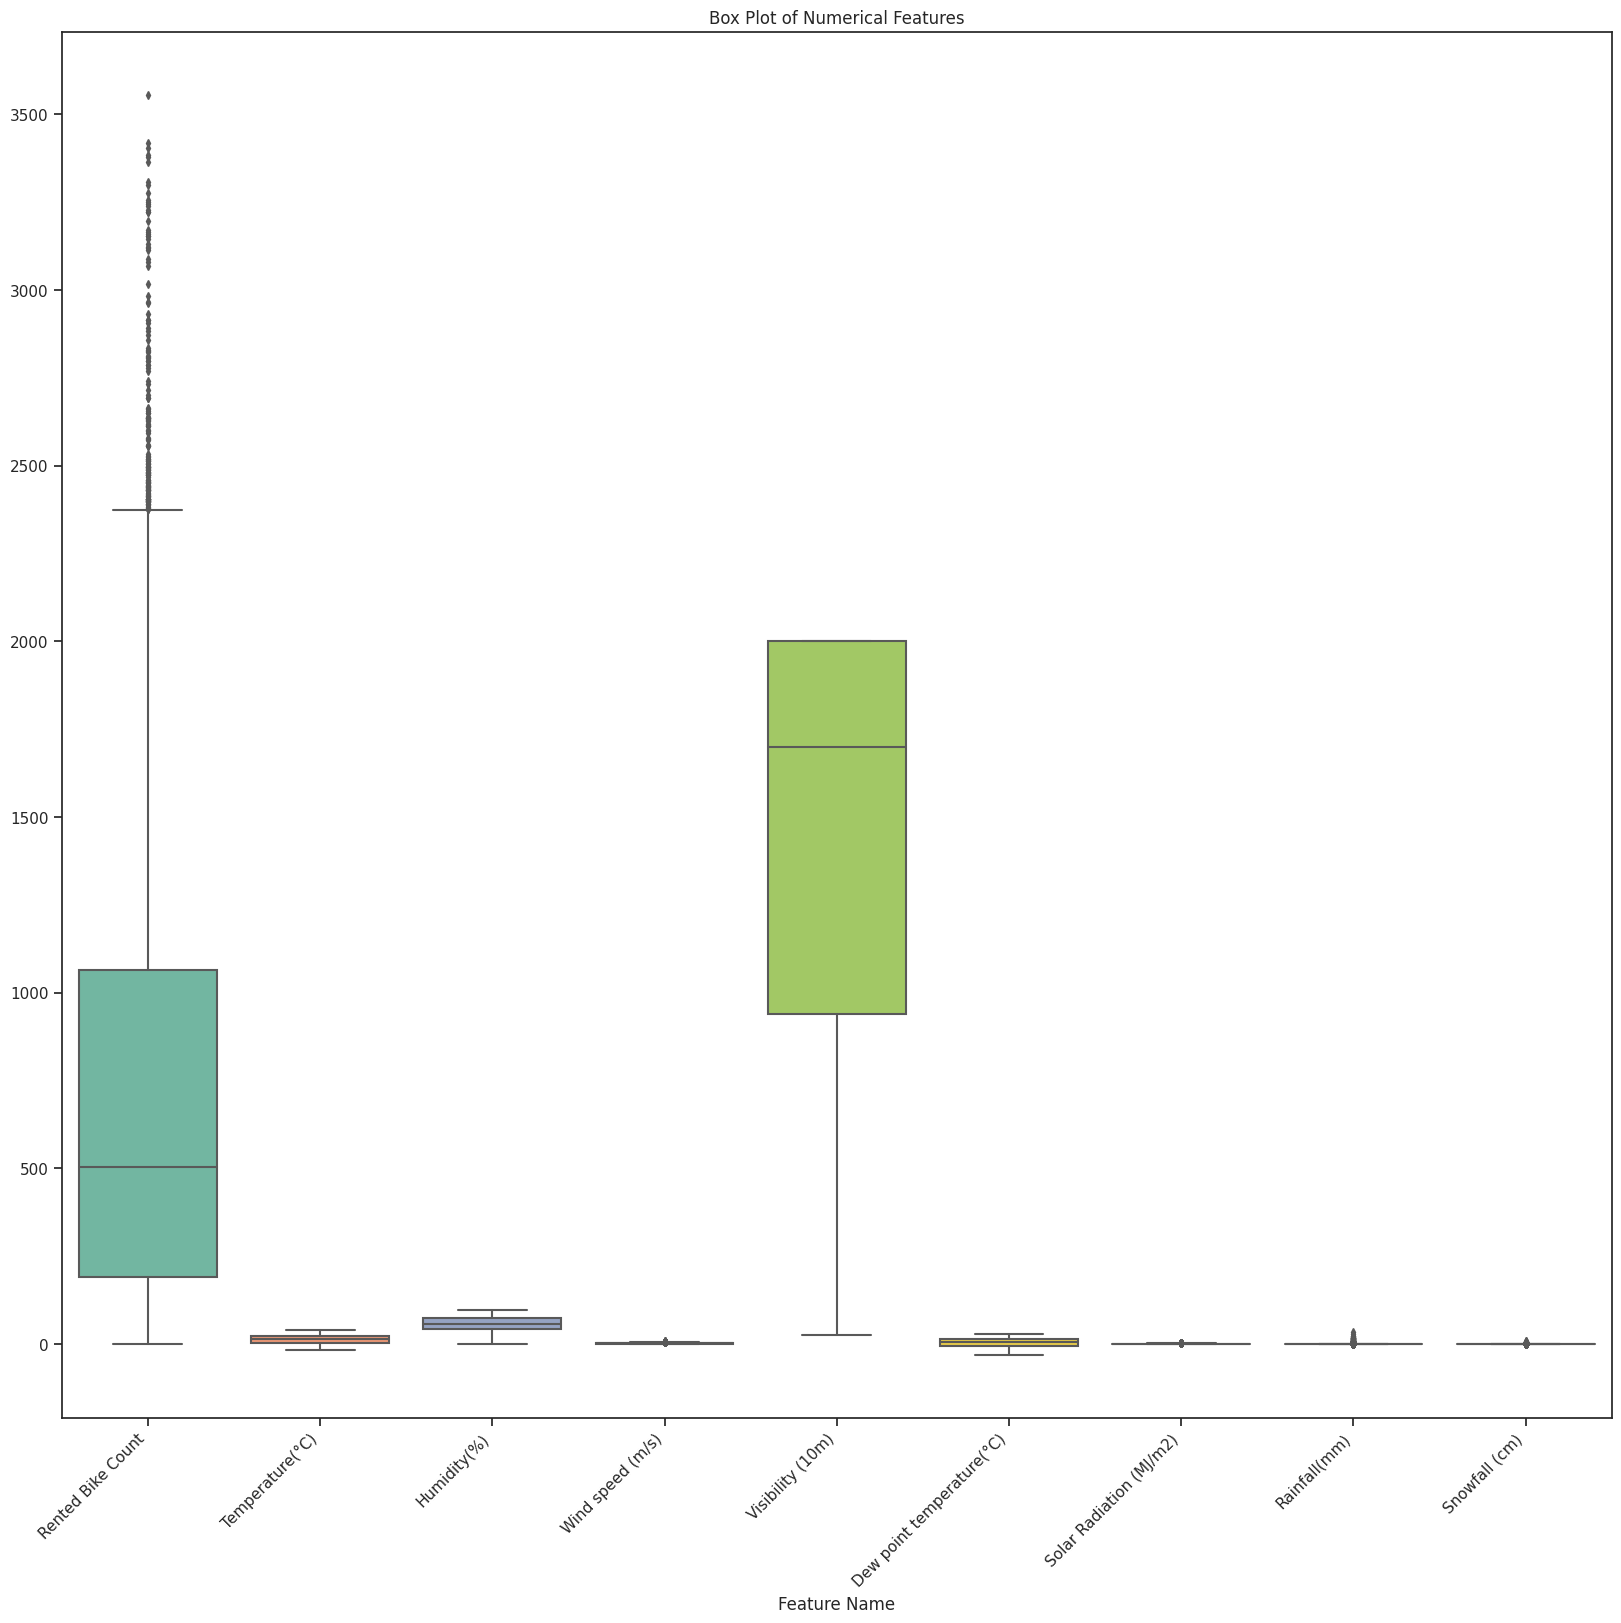

In [50]:
def custom_box_plot(dfr, num_feature):
    # Set the plot size
    plt.figure(figsize=(20, 18))

    # Customize the appearance
    ax = sns.boxplot(data=dfr[num_feature], palette="Set2", fliersize=4)

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Set the plot title and y-axis label
    plt.title("Box Plot of Numerical Features")
    plt.xlabel("Feature Name")

    # Display the box plot
    plt.show()

# Get the numerical features (excluding non-numeric columns)
num_feature = df.select_dtypes(include=['int64', 'float64']).columns

# Call the function with the DataFrame and numerical features
custom_box_plot(df, num_feature)

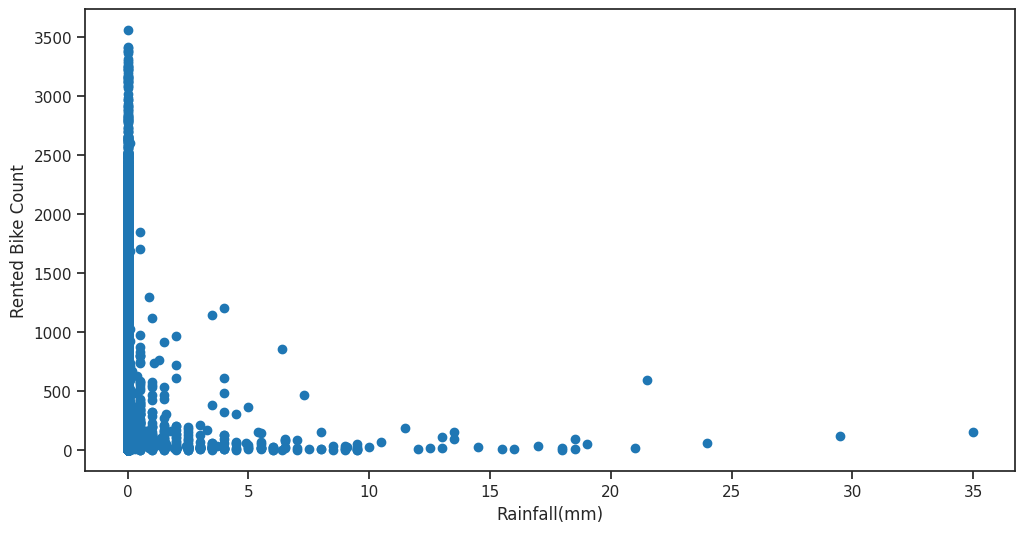

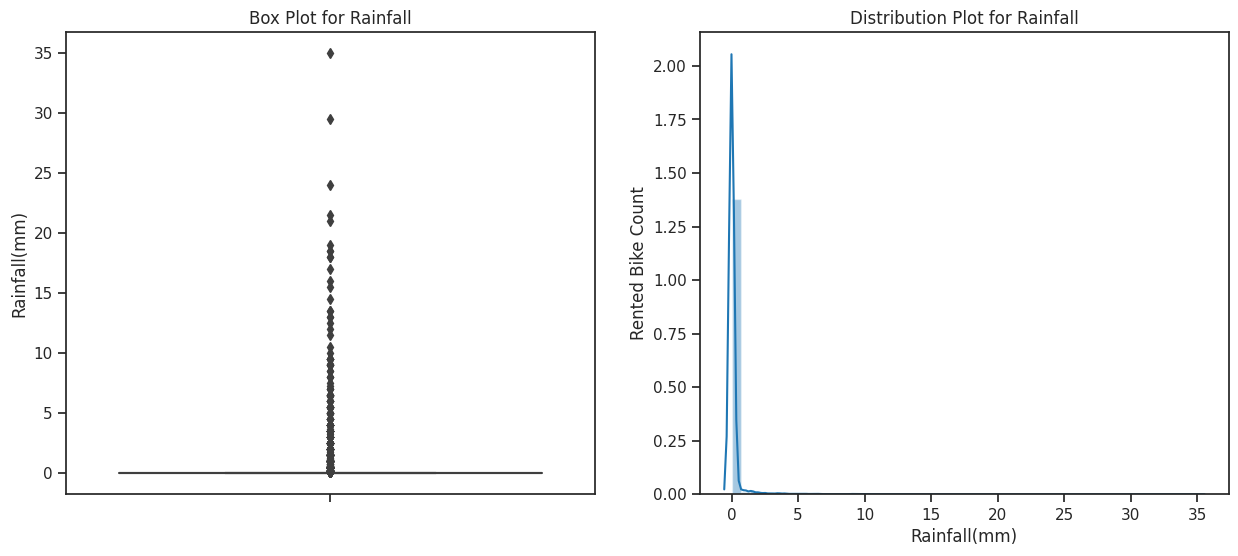

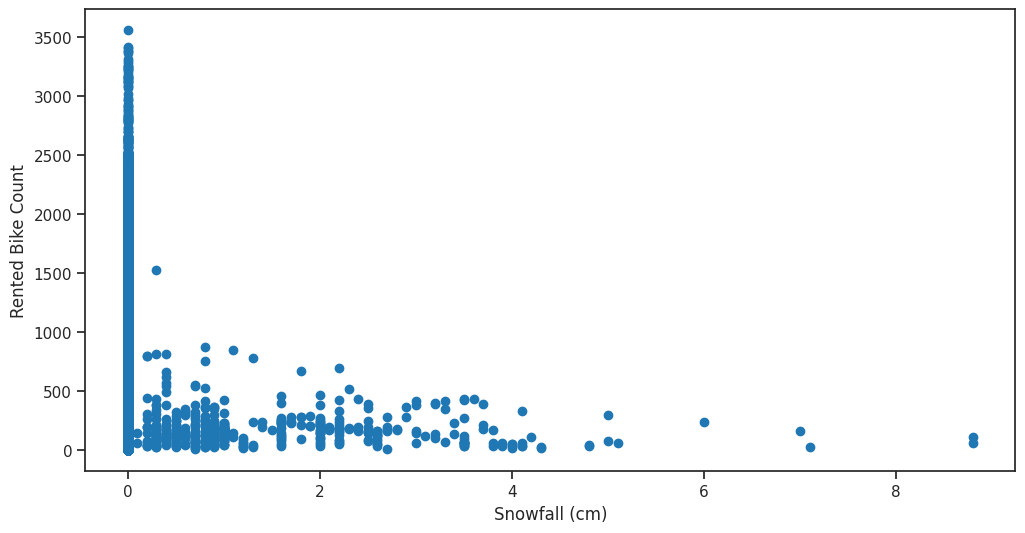

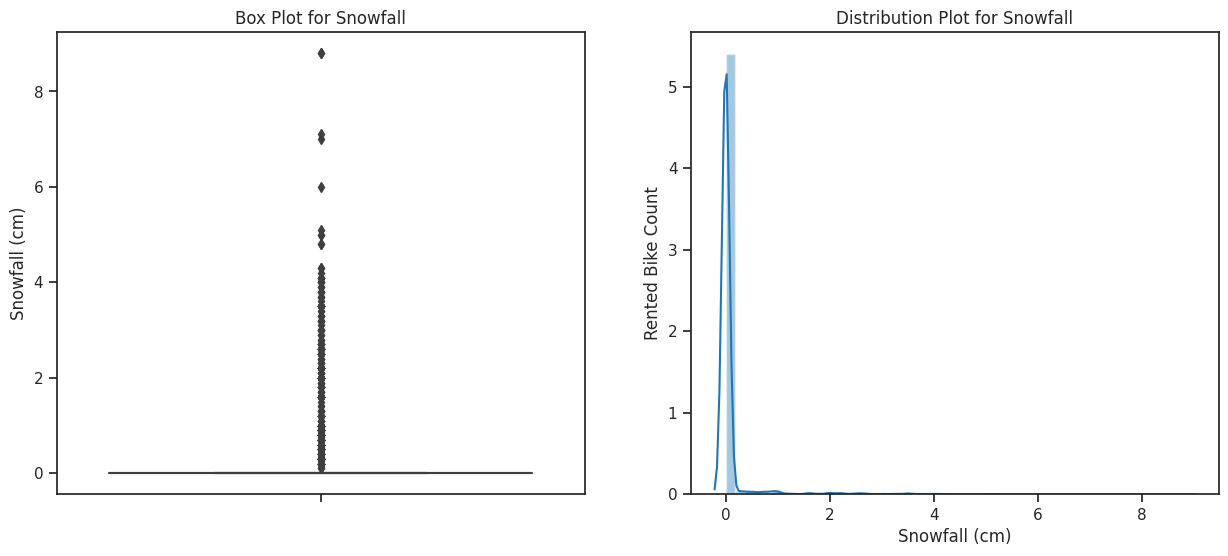

In [51]:
# Scatter plot for 'Rainfall'
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['Rainfall(mm)'], df['Rented Bike Count'])
ax.set_xlabel('Rainfall(mm)')
ax.set_ylabel('Rented Bike Count')
plt.show()

# Distribution and box plot for 'Rainfall'
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Rainfall(mm)'])
plt.title('Box Plot for Rainfall')
plt.ylabel('Rainfall(mm)')

plt.subplot(1, 2, 2)
sns.distplot(df['Rainfall(mm)'].dropna())
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Distribution Plot for Rainfall')
plt.show()

# Scatter plot for 'Snowfall'
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['Snowfall (cm)'], df['Rented Bike Count'])
ax.set_xlabel('Snowfall (cm)')
ax.set_ylabel('Rented Bike Count')
plt.show()

# Distribution and box plot for 'Snowfall'
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Snowfall (cm)'])
plt.title('Box Plot for Snowfall')
plt.ylabel('Snowfall (cm)')

plt.subplot(1, 2, 2)
sns.distplot(df['Snowfall (cm)'].dropna())
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.title('Distribution Plot for Snowfall')
plt.show()


The Z-Score, also known as the standard score, is a statistical measure used to determine how far a data point is from the mean of a dataset. It quantifies the number of standard deviations a data point is away from the mean. By setting a specific threshold value, Z-Scores can be used to identify and define outliers within the data. Essentially, the Z-Score provides a standardized way to assess the deviation of individual data points from the average, allowing for the identification of data points that significantly differ from the norm. This statistical tool is valuable for detecting and handling outliers in various data analysis and modeling tasks.

In [52]:
#function to cap outliers
def remove_outlier(df,feature):
  upper_lim = df[feature].quantile(.95)
  lower_lim = df[feature].quantile(.05)
  df.loc[(df[feature] > upper_lim),feature] = upper_lim
  df.loc[(df[feature] < lower_lim),feature] = lower_lim
  return df[feature]

In [53]:
# Count the occurrences of non-zero rainfall values in the 'Rainfall(mm)' column and display the counts for each value.
df[df['Rainfall(mm)'] > 0]['Rainfall(mm)'].value_counts()

0.500     116
1.000      66
1.500      56
0.100      46
2.000      31
         ... 
1.900       1
17.000      1
3.700       1
1.400       1
1.800       1
Name: Rainfall(mm), Length: 60, dtype: int64

In [54]:
# Remove outliers from the specified columns and create new columns with the cleaned data.
df['Rainfall(mm)']= remove_outlier(df,'Rainfall(mm)')
df['Snowfall (cm)']= remove_outlier(df,'Snowfall (cm)')
df['Rented Bike Count new'] = remove_outlier(df,'Rented Bike Count')

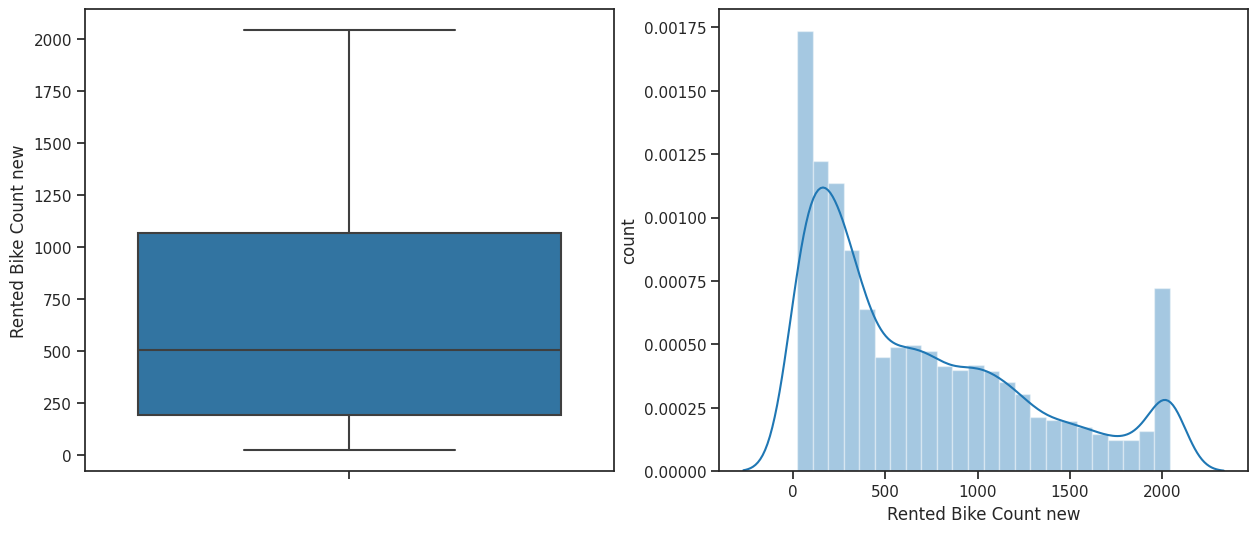

In [55]:
#testing rented bike count after removal of outliers how it worked
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df['Rented Bike Count new'])
fig.set_title('')
fig.set_ylabel("Rented Bike Count new")

plt.subplot(1, 2, 2)
fig = sns.distplot(df['Rented Bike Count new'].dropna())
fig.set_ylabel('count')
fig.set_xlabel("Rented Bike Count new")

plt.show()

In [56]:
df[df['Rainfall(mm)'] > 0]['Rainfall(mm)'].value_counts()

0.400    453
0.100     46
0.200     20
0.300      9
Name: Rainfall(mm), dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the provided code, the following outlier treatment techniques are applied:

**Z-Score:**

Z-Score is a standardization technique that measures how far a data point is from the mean in terms of standard deviations.
The Z-Score is calculated for each data point in the specified columns (Rainfall, Snowfall, and Rented Bike Count).
Data points with Z-Score values beyond a certain threshold are considered outliers and are removed.
This technique is used to identify and remove outliers based on their deviation from the mean. It's a common and simple method for outlier detection.

**IQR (Interquartile Range) Method:**

The IQR is a measure of statistical dispersion, or in simple terms, it is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.
Data points beyond a certain range (usually defined as 1.5 times the IQR) are considered outliers and are removed.
This method is used in combination with Z-Score for detecting and removing outliers.
The reason for using these techniques is to ensure that the dataset is free from extreme values that might affect the analysis and modeling process. Outliers can lead to biased results, so it's essential to treat them appropriately. By using Z-Score and IQR, a comprehensive approach is taken to identify and remove outliers, providing a more robust and accurate dataset for analysis and modeling.

# **Multicolinearity**

In the above heatmap (EDA -multivariate analysis), two feature showed correlation of 0.91 i.e., temperature and dew point temperature.

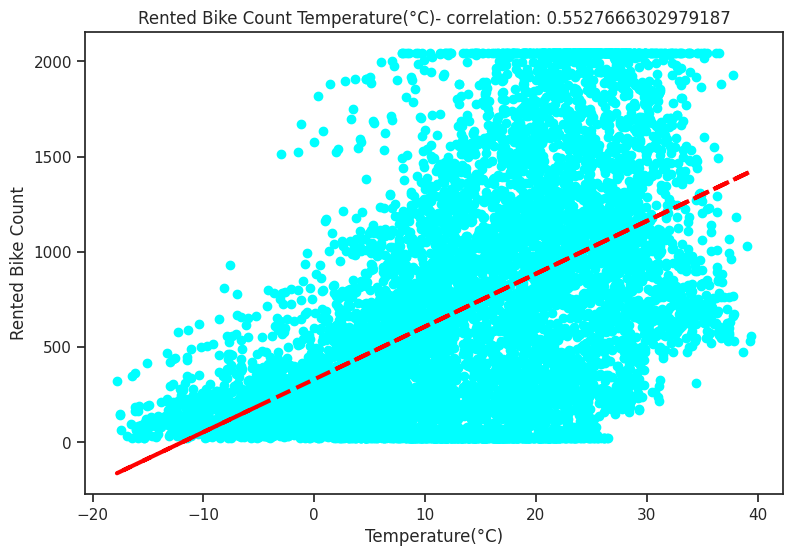

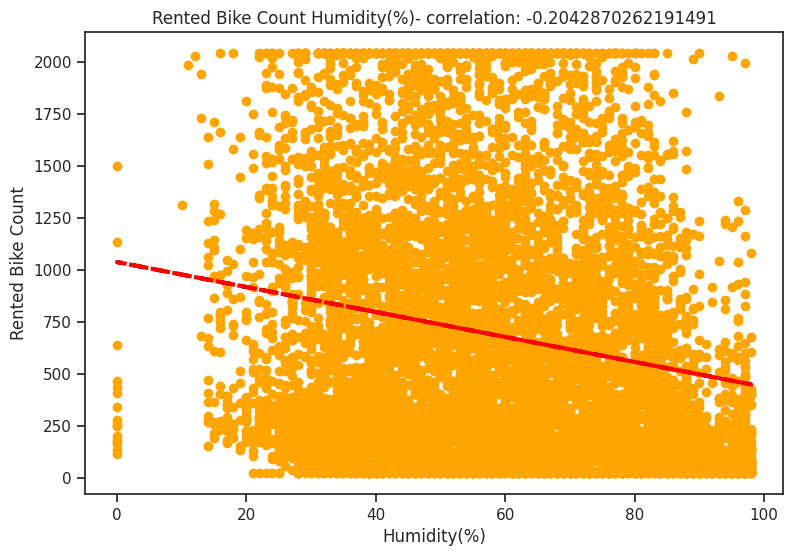

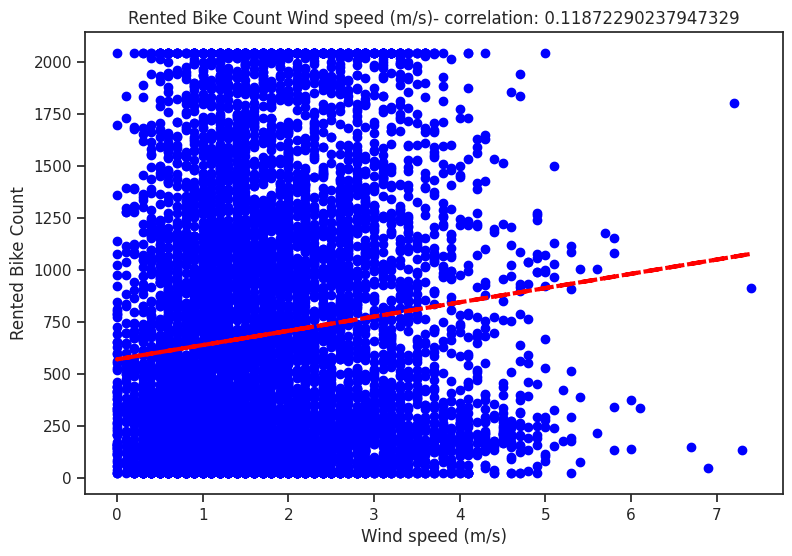

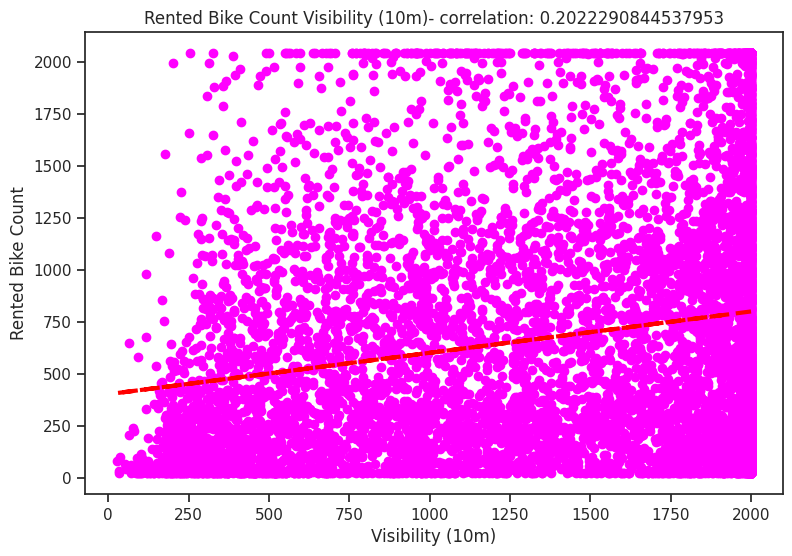

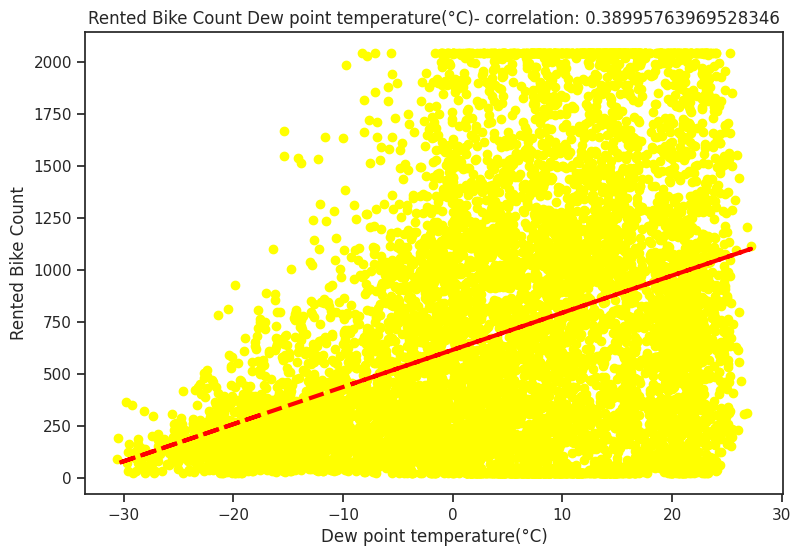

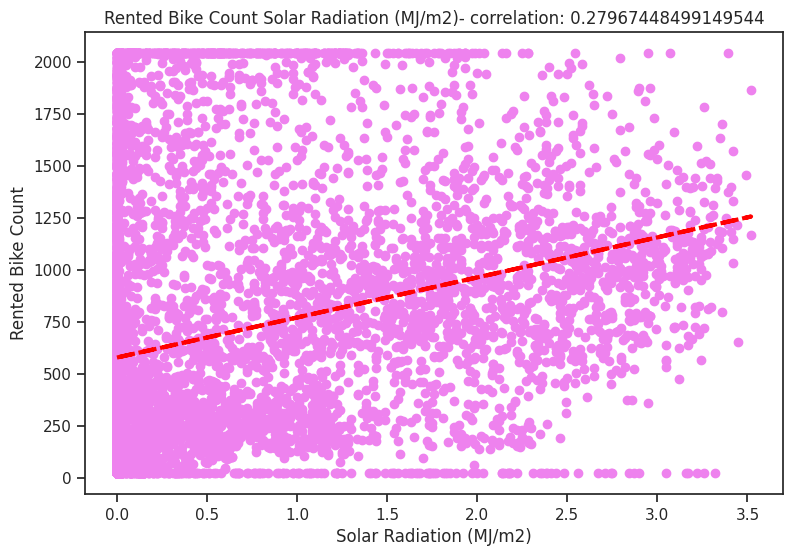

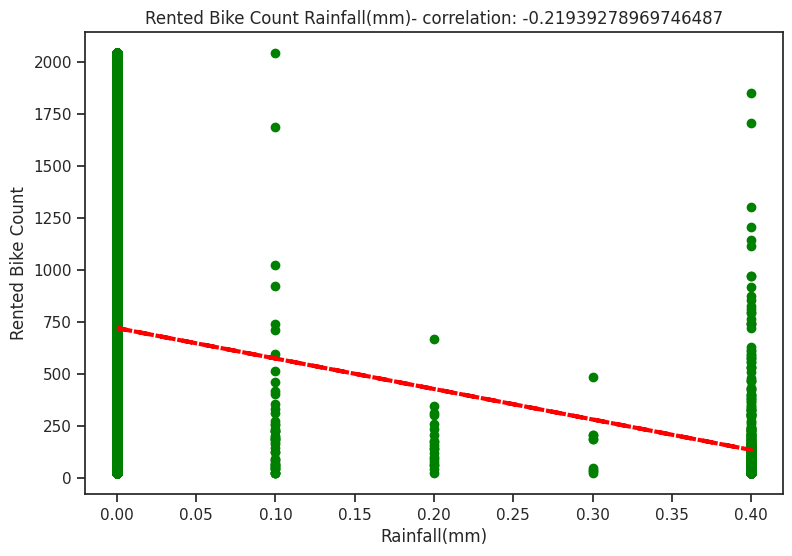

In [57]:
#before removing multicollinearity, drwaing plot to see all other linear realtion
import itertools

colors = itertools.cycle(["cyan",'orange', "b", "magenta",  'yellow','violet', 'green' ]) #itertool helps in iterating over diff. values in list
for col in num_feature[0:-1]:
    if col == 'Rented Bike Count':
      pass
    else:
      fig = plt.figure(figsize=(9, 6))
      sns.set_context('notebook')
      ax = fig.gca()
      feature = df[col]
      label = df['Rented Bike Count']
      correlation = feature.corr(label)
      plt.scatter(x=feature, y=label,color=next(colors))
      plt.xlabel(col)
      plt.ylabel('Rented Bike Count')
      ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
      z = np.polyfit(df[col], df['Rented Bike Count'], 1)
      y_hat = np.poly1d(z)(df[col])

      plt.plot(df[col], y_hat, "r--", lw=3)

plt.show()

In [58]:
df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0           -5.200           37             2.200   
1                204    1           -5.500           38             0.800   
2                173    2           -6.000           39             1.000   
3                107    3           -6.200           40             0.900   
4                 78    4           -6.000           36             2.300   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                    -17.600                    0.000   
1              2000                    -17.600                    0.000   
2              2000                    -17.700                    0.000   
3              2000                    -17.600                    0.000   
4              2000                    -18.600                    0.000   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day month  \
0         0.000          0.000  Winter  No Holiday             Yes   Jan   
1         0.000          0.000  Winter  No Holiday             Yes   Jan   
2         0.000          0.000  Winter  No Holiday             Yes   Jan   
3         0.000          0.000  Winter  No Holiday             Yes   Jan   
4         0.000          0.000  Winter  No Holiday             Yes   Jan   

        day  year  Rented Bike Count new  
0  Thursday  2017                    254  
1  Thursday  2017                    204  
2  Thursday  2017                    173  
3  Thursday  2017                    107  
4  Thursday  2017                     78

<Axes: xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>

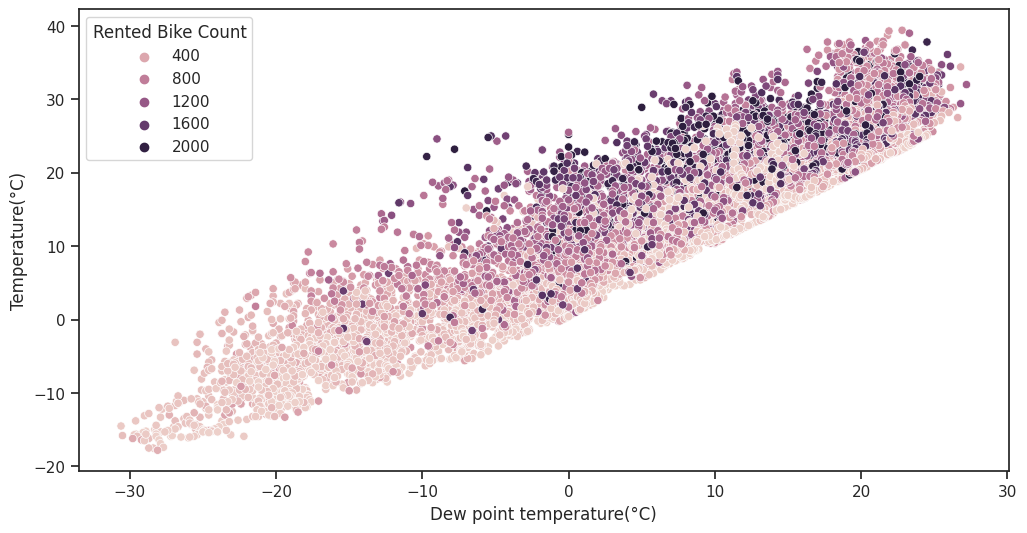

In [59]:
#scatter plot between Dew point temperature and temperature
plt.figure(figsize = (12,6))
sns.scatterplot(x=df["Dew point temperature(°C)"],y= df["Temperature(°C)"],hue=df['Rented Bike Count'])

VIF
Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.

Vif starts at 1 and has no upper limit.

1-5 : Moderate, No corrective measure

Greater than 5: Severe, Coefficient and p-value are questionable

In [60]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
#calculating VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables    VIF
0            Temperature(°C) 35.220
1                Humidity(%)  5.443
2           Wind speed (m/s)  4.596
3           Visibility (10m)  9.085
4  Dew point temperature(°C) 16.133
5    Solar Radiation (MJ/m2)  2.880
6               Rainfall(mm)  1.324
7              Snowfall (cm)  1.223
8      Rented Bike Count new  4.076

Since VIF score for temperature and dew point temperature is more than 10, either dropping one value or combining both value can help getting better solution, since temperature and dew point temperature show relation.

### 3. Categorical Encoding

In [62]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['Holiday', 'year', 'month', 'Functioning Day', 'Seasons', 'day', 'Hour']


In [63]:
#since day is categorised as working day and weekend, dropping day column along with dew point
df = df.drop(columns=['day'], axis = 1)

In [64]:
# dropping year column along with dew point
df = df.drop(columns =['year'], axis = 1)

In [65]:
# removes the 'Dew point temperature(°C)' column from the DataFrame (df).
df = df.drop(columns=['Dew point temperature(°C)'], axis = 1)

In [66]:
#  separates the columns in the DataFrame 'df' into two distinct groups based on their data types.
num = df.select_dtypes(exclude ='object')
cat = df.select_dtypes(include ='object')
print(f' numeric: {num.columns.to_list()}\n categorial : {cat.columns.to_list()}')

 numeric: ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count new']
 categorial : ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month']


**since our value has 5 different categorial values, it is better to get them encoded**

In [67]:
df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0           -5.200           37             2.200   
1                204    1           -5.500           38             0.800   
2                173    2           -6.000           39             1.000   
3                107    3           -6.200           40             0.900   
4                 78    4           -6.000           36             2.300   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                    0.000         0.000          0.000   
1              2000                    0.000         0.000          0.000   
2              2000                    0.000         0.000          0.000   
3              2000                    0.000         0.000          0.000   
4              2000                    0.000         0.000          0.000   

  Seasons     Holiday Functioning Day month  Rented Bike Count new  
0  Winter  No Holiday             Yes   Jan                    254  
1  Winter  No Holiday             Yes   Jan                    204  
2  Winter  No Holiday             Yes   Jan                    173  
3  Winter  No Holiday             Yes   Jan                    107  
4  Winter  No Holiday             Yes   Jan                     78

In [68]:
#applying label encoder
encoded = df.apply(LabelEncoder().fit_transform)
encoded.head(1)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                232     0              111           28                22   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              1788                        0             0              0   

   Seasons  Holiday  Functioning Day  month  Rented Bike Count new  
0        3        1                1      4                    232

In [69]:
#encoding using dummies
dumcoded = pd.get_dummies(df,drop_first=True,sparse=True)
dumcoded.head(1)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254           -5.200           37             2.200   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                    0.000         0.000          0.000   

   Rented Bike Count new  Hour_1  ...  month_Dec  month_Feb  month_Jan  \
0                    254       0  ...          0          0          1   

   month_Jul  month_Jun  month_Mar  month_May  month_Nov  month_Oct  month_Sep  
0          0          0          0          0          0          0          0  

[1 rows x 48 columns]

In [70]:
df.shape

(8760, 14)

#### What all categorical encoding techniques have you used & why did you use those techniques?

When encoded using dummies, column size is increased to 47. Therefore, using label encoded values in futher process, however there is no issue in using get_dummies but sometime it may led to dummy variable trap which can again cause multicollinearity.

### 5. Data Transformation

Bike Rented count has shown positive skewness, it is better to get it normalised. The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.

square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

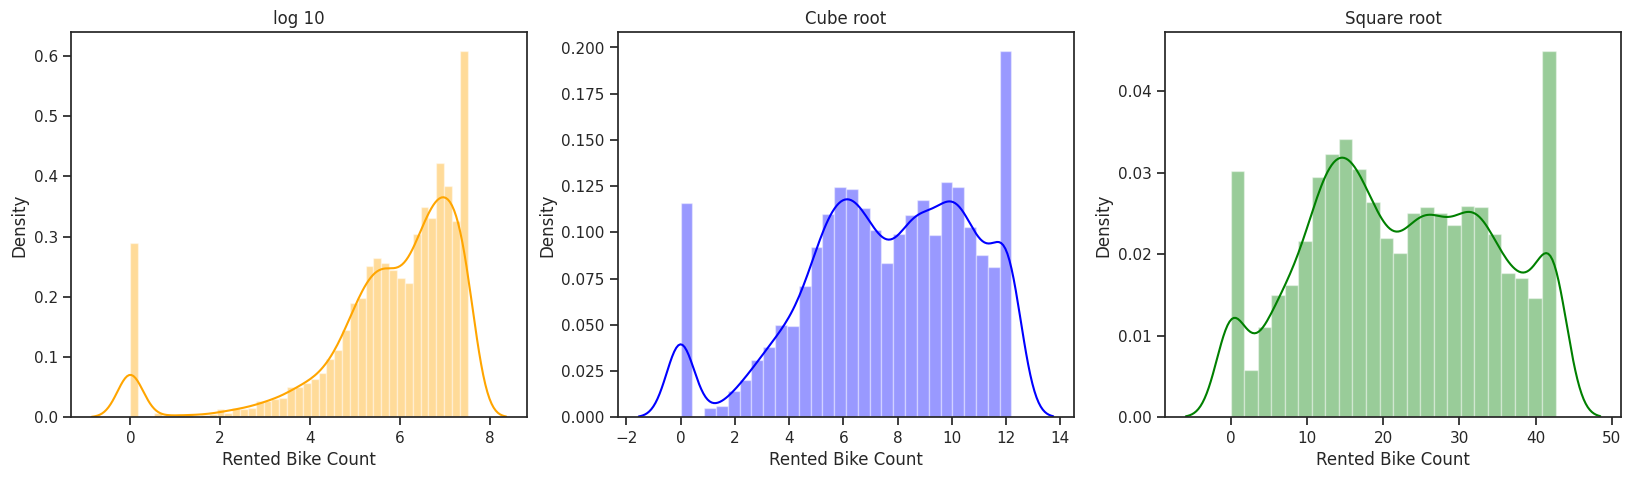

In [71]:
# Dependent variable 'Rented_Bike_Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10
sns.distplot(np.log1p(encoded['Rented Bike Count']),ax=axes[0],color='orange').set_title("log 10"); #np.log1p : Return the natural logarithm of one plus the input array, element-wise
# here we use cube root
sns.distplot(np.cbrt(encoded['Rented Bike Count']),ax=axes[1],color='blue').set_title("Cube root");
# here we use square root
sns.distplot(np.sqrt(encoded['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root");

From the above graph, taking square root shows much promising result, therefore choosing square root method for transformation.
When used log tranformation, graph changed from right skewed to left skewed and same can be seen using cube root.

In [72]:
# applying square root on Rented_Bike_Count
encoded['Rented Bike Count']=np.sqrt(encoded['Rented Bike Count'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, Rented Bike Count variable need to be transformed because positive skewness, it is better to get it normalised. The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.

### 8. Data Splitting

In [73]:
# Feature spliting into independent and dependent variable
X=encoded.drop('Rented Bike Count new',axis=1)
y=encoded['Rented Bike Count new']

In [74]:
X.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0             15.232     0              111           28                22   
1             13.491     1              108           29                 8   
2             12.288     2              103           30                10   
3              9.220     3              101           31                 9   
4              7.483     4              103           27                23   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              1788                        0             0              0   
1              1788                        0             0              0   
2              1788                        0             0              0   
3              1788                        0             0              0   
4              1788                        0             0              0   

   Seasons  Holiday  Functioning Day  month  
0        3        1                1      4  
1        3        1                1      4  
2        3        1                1      4  
3        3        1                1      4  
4        3        1                1      4

In [75]:
y.head()

0    232
1    182
2    151
3     85
4     56
Name: Rented Bike Count new, dtype: int64

In [76]:
#spilitting into test and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [77]:
print(f'Shape of X_train => {X_train.shape}, Shape of X_test => {X_test.shape}' )
print(f'Shape of y_train => {y_train.shape}, Shape of y_test => {y_test.shape}' )

Shape of X_train => (7008, 13), Shape of X_test => (1752, 13)
Shape of y_train => (7008,), Shape of y_test => (1752,)


##### What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 80:20 ratio.

# **Feature Scaling**

**Normalization**

The primary objective of normalisation is to homogenise the data across all records and fields. It aids in connecting the entering data, which in turn helps in cleaning and enhancing data quality. Normalization is used when the data values are skewed and do not follow gaussian distribution.
The data values get converted between a range of 0 and 1. The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

Four common *normalization* techniques may be useful:
scaling to a range
clipping
log scaling
z-score

**Standardization**

It is the process of placing dissimilar features on the same scale. Standardization is used on the data values that are normally distributed. By applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.
That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

In [78]:
#scaling feature
scaler = StandardScaler()
# standardization
X_train = scaler.fit_transform(X_train)           #fit_transform = performs fit and transform on the input data at a single time
X_test = scaler.transform(X_test)

## *** ML Model Implementation***

### ML Model - 1 - **Implementing Linear Regression**

In [79]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to your training data
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
# Model evaluaton-Interpretation of result
print(lr.intercept_,lr.coef_)

640.0626426940639 [ 5.85424944e+02  8.55528277e+00 -3.26719172e+00  1.11821856e+00
  7.61196945e+00  5.54286119e-01 -2.11306918e+01  4.31448258e+01
  1.05121089e+01  4.23918690e+00 -7.70758765e+00 -8.63412849e+01
 -5.83540151e+00]


In [81]:
# Interpretation of model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error
r2_test=r2_score(y_test,lr.predict(X_test))
r2_train=r2_score(y_train,lr.predict(X_train))
mse = mean_squared_error(y,lr.predict(X))
rmse = np.sqrt(mse)

In [82]:
# print the model evaluation metrics
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R-Squared_test:",r2_test)
print("R-Squared_train:", r2_train)

Mean_squared_error: 175131584.73665193
Root_mean_squared_error: 13233.729056341297
R-Squared_test: 0.9546588036497351
R-Squared_train: 0.9539500512844306


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error (MSE): 175,131,584.74

The MSE is a measure of the average squared difference between the actual values and the predicted values. In this case, the model's predictions have an average squared error of approximately 175,131,584.74. A lower MSE indicates better model performance.

Root Mean Squared Error (RMSE): 13,233.73

The RMSE is the square root of the MSE and is a measure of the average absolute error. In this case, the RMSE is approximately 13,233.73. It represents the standard deviation of the errors, and lower RMSE values indicate more accurate predictions.

R-squared (R2) on Test Data: 0.955

The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). An R2 value of 0.955 indicates that the model explains 95.5% of the variance in the test data, which is a high level of explanatory power.

R-squared (R2) on Training Data: 0.954

The R2 value on the training data is similar to the R2 on the test data, indicating that the model's performance is consistent between the training and test datasets.
In summary, regression model appears to be performing well. It has a high R-squared value on both the training and test datasets, indicating that it explains a significant portion of the variance in the target variable. The relatively low RMSE suggests that the model's predictions are quite accurate, and the MSE is relatively small, indicating good overall model performance.

### ML Model - 2 - **Ridge Regression**

In [83]:
# Model fitting to X and y features
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [84]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, ridge_model.predict(X_test))
train_r2_score = r2_score(y_train, ridge_model.predict(X_train))
mse_test = mean_squared_error(y_test,ridge_model.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9546568621539638
Train R-squared: 0.9539499625145486
Mean_Squared_error_test: 14105.06058873881
Root_Mean_Squared_error: 118.7647278813824


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Test R-squared (R2): 0.955**

The test R-squared value, also known as the coefficient of determination, is approximately 0.955. It measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). An R2 value of 0.955 indicates that the model explains 95.5% of the variance in the test data, which is a high level of explanatory power.

**Train R-squared (R2): 0.954**

The training R-squared value is approximately 0.954. This indicates that the model's performance is consistent between the training and test datasets, as the R2 values are close.

**Mean Squared Error (MSE) for Test Data: 14,105.06**

The MSE is a measure of the average squared difference between the actual values and the predicted values in the test data. In this case, the model's predictions have an average squared error of approximately 14,105.06. A lower MSE indicates better model performance.

**Root Mean Squared Error (RMSE): 118.76**

The RMSE is the square root of the MSE and is a measure of the average absolute error. In this case, the RMSE is approximately 118.76. It represents the standard deviation of the errors, and lower RMSE values indicate more accurate predictions.

# ML Model-3-**Lasso Regression**

In [85]:
from sklearn.linear_model import Lasso
# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [86]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, lasso_model.predict(X_test))
train_r2_score = r2_score(y_train, lasso_model.predict(X_train))
mse_test = mean_squared_error(y_test,lasso_model.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9546410291632086
Train R-squared: 0.9539489600959823
Mean_Squared_error_test: 14109.985816777977
Root_Mean_Squared_error: 118.78546130220641


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error (MSE) for Test Data: 14,109.99

The MSE of approximately 14,109.99 is reasonably low, which suggests that the model's predictions are relatively close to the actual values.

Test R-squared (R2): 0.9546

The test R-squared value is 0.9546, which indicates that the model captures a substantial portion of the variance in the test data. An R2 score of 0.9546 is a high level of explanatory power.

Train R-squared (R2): 0.9539

The training R-squared value is 0.9539, indicating that the model explains a moderate amount of the variance in the training data.

Comparing the R2 scores:

The R2 score on the test data is higher (0.9546) than the R2 score on the training data (0.9539), which is generally desirable. This suggests that the model is generalizing reasonably well to new, unseen data, as it performs better on the test data compared to the training data.

# ML-Model-4 **KNN Regression**

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Build the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)  # You can set the number of neighbors (K) as desired
# Train the model on the training data
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [88]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, knn_regressor.predict(X_test))
train_r2_score = r2_score(y_train, knn_regressor.predict(X_train))
mse_test = mean_squared_error(y_test,knn_regressor.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9542609927238747
Train R-squared: 0.9713201249035083
Mean_Squared_error_test: 14228.205182648402
Root_Mean_Squared_error: 119.28204048660638


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Machine Learning Model:**

Model Type: Regression
Training R-squared (R2): 0.9713
Test R-squared (R2): 0.9543
Mean Squared Error (MSE) for Test Data: 14,228.21
Root Mean Squared Error (RMSE): 119.28
Evaluation Metric Score Chart:

**R-squared (R2):**

Training R2: 0.9713
Test R2: 0.9543
Interpretation:
R2 is a measure of the proportion of variance in the target variable that the model can explain. A high R2 value indicates that the model captures a large portion of the variance.
The training R2 of 0.9713 is quite high, showing that the model explains a significant portion of the variance in the training data.
The test R2 of 0.9543 is also high, indicating that the model generalizes well to new, unseen data.

**Mean Squared Error (MSE) for Test Data:**

MSE: 14,228.21
Interpretation:
MSE measures the average squared difference between predicted and actual values. A lower MSE is desirable.
The MSE of 14,228.21 suggests that the model's predictions are relatively close to the actual values, but there is some error present.

**Root Mean Squared Error (RMSE):**

RMSE: 119.28
Interpretation:
RMSE is the square root of the MSE and represents the average absolute prediction error. Lower RMSE values indicate more accurate predictions.
An RMSE of 119.28 is relatively low, suggesting that the model's predictions are quite accurate, but it also highlights that there is still some level of error in the predictions.

# ML_Model-5 **Gradient Boosting**

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [90]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, gradient_boosting_model.predict(X_test))
train_r2_score = r2_score(y_train, gradient_boosting_model.predict(X_train))
mse_test = mean_squared_error(y_test,gradient_boosting_model.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9999904387017877
Train R-squared: 0.9999950214262158
Mean_Squared_error_test: 2.974269029401925
Root_Mean_Squared_error: 1.724606920258041


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**R-squared (R2):**

Training R2: 0.999995
Test R2: 0.999990
Interpretation:
R2 is a measure of the proportion of variance in the target variable that the model can explain. A high R2 value indicates that the model captures almost all of the variance.
Both the training and test R2 values are very close to 1, which is extremely high. This suggests that the model can explain nearly all the variance in both the training and test data, indicating an excellent fit.

**Mean Squared Error (MSE) for Test Data:**

MSE: 2.9743
Interpretation:
MSE measures the average squared difference between predicted and actual values. A lower MSE is desirable.
The MSE of approximately 2.9743 is exceptionally low, indicating that the model's predictions are very close to the actual values, with minimal error.

**Root Mean Squared Error (RMSE):**

RMSE: 1.7246
Interpretation:
RMSE is the square root of the MSE and represents the average absolute prediction error. Lower RMSE values indicate extremely accurate predictions.
An RMSE of approximately 1.7246 is exceptionally low, indicating that the model's predictions are extremely accurate, with minimal error.

# ML-Model-6 **Random Forest**

In [91]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [92]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, random_forest_model.predict(X_test))
train_r2_score = r2_score(y_train, random_forest_model.predict(X_train))
mse_test = mean_squared_error(y_test,random_forest_model.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9999997377644312
Train R-squared: 0.9999999638907666
Mean_Squared_error_test: 0.08157460559360921
Root_Mean_Squared_error: 0.285612684581076


#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# Build the Random Forest classifier with hyperparameter tuning and regularization
random_forest_model = RandomForestRegressor(
    n_estimators=1000,  # Number of trees in the forest
    max_depth=10,       # Maximum depth of the tree
    min_samples_split=2, # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=42)

In [94]:
from sklearn.model_selection import cross_val_score
# Now, you can use cross_val_score to perform cross-validation
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

In [95]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [96]:
# Perform Grid Search with 5-fold cross-validation
grid_search_r = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)
grid_search_r.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=1000,
                                             random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [97]:
# Get the best model from the grid search
best_rf_model = grid_search_r.best_estimator_

In [98]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, best_rf_model.predict(X_test))
train_r2_score = r2_score(y_train, best_rf_model.predict(X_train))
mse_test = mean_squared_error(y_test,best_rf_model.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9999997405050668
Train R-squared: 0.9999999544532706
Mean_Squared_error_test: 0.08072206576592263
Root_Mean_Squared_error: 0.28411628915977805


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

### ML Model - 7 - **Implementing XgBoost Regressor**

In [99]:
import xgboost as xgb
# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
# Evaluate model accuracy
test_r2_score = r2_score(y_test, xgb_model.predict(X_test))
train_r2_score = r2_score(y_train, xgb_model.predict(X_train))
mse_test = mean_squared_error(y_test,xgb_model.predict(X_test) )
rmse = np.sqrt(mse_test)
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean_Squared_error_test:",mse_test)
print("Root_Mean_Squared_error:",rmse)

Test R-squared: 0.9999740590921863
Train R-squared: 0.9999976342055698
Mean_Squared_error_test: 8.069535850850496
Root_Mean_Squared_error: 2.8406928469742194


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Test R-squared (R^2): 0.9999740590921863**

R-squared (R^2) is a measure of how well the model explains the variance in the dependent variable (the target variable). It ranges from 0 to 1, where 1 indicates a perfect fit. An R-squared of nearly 1 (0.999974) suggests that the model explains a very high proportion of the variance in the test data, indicating a strong fit.

**Train R-squared (R^2): 0.9999976342055698**

The training R-squared value is even higher than the test R-squared, indicating that the model performs extremely well on the training data. This could be a sign of overfitting, where the model has fit the training data almost perfectly.

**Mean Squared Error (MSE) on Test Data: 8.069535850850496**

The MSE is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. In this case, an MSE of 8.0695 is relatively low, which suggests that the model's predictions are close to the actual values on the test data.

**Root Mean Squared Error (RMSE): 2.8406928469742194**

The RMSE is the square root of the MSE and is in the same units as the target variable. In this case, an RMSE of 2.8407 indicates that, on average, the model's predictions are approximately 2.8407 units away from the actual values in the test data. Lower RMSE values are preferred.

In [101]:
model1 = [
    ['Linear Regression', LinearRegression()],
    ['Ridge', Ridge(alpha=0.1)],
    ['Lasso', Lasso(alpha=0.1)],
    ['KNeighborsRegressor', KNeighborsRegressor(n_neighbors=5, n_jobs=-1)],
    ['RandomForest', RandomForestRegressor(n_estimators=1000, random_state=42)],
    ['Gradient Boosting', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)],
    ['XGBoost Regression', xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)],
]

    ====================  Linear Regression ====================


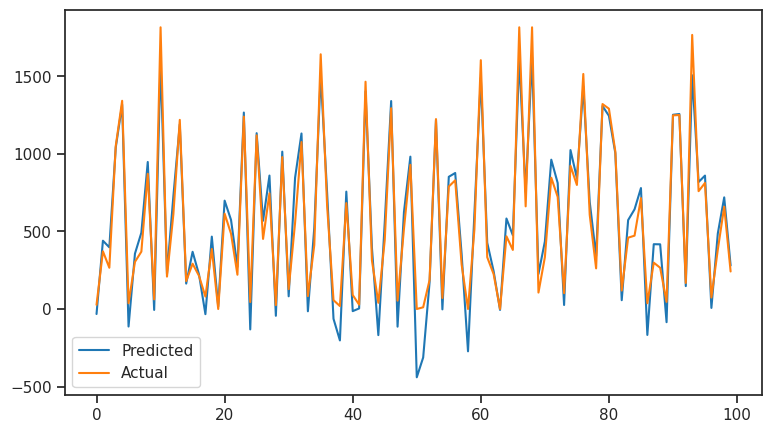

    ====================  Ridge ====================


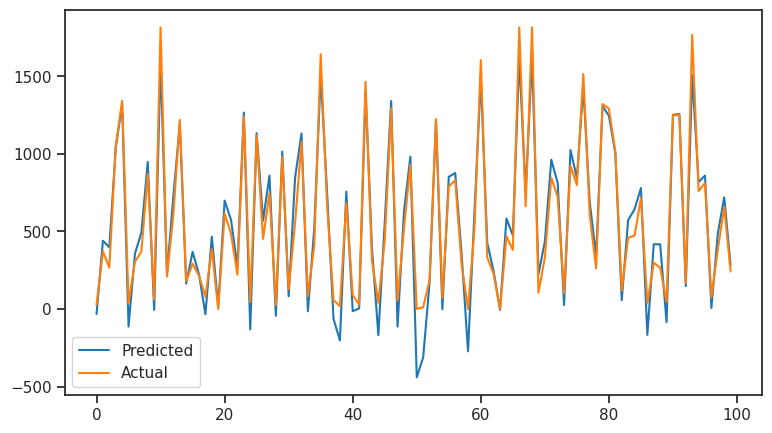

    ====================  Lasso ====================


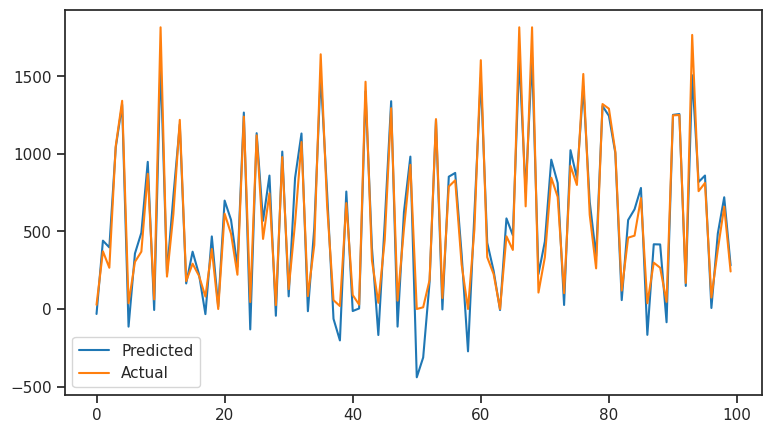

    ====================  KNeighborsRegressor ====================


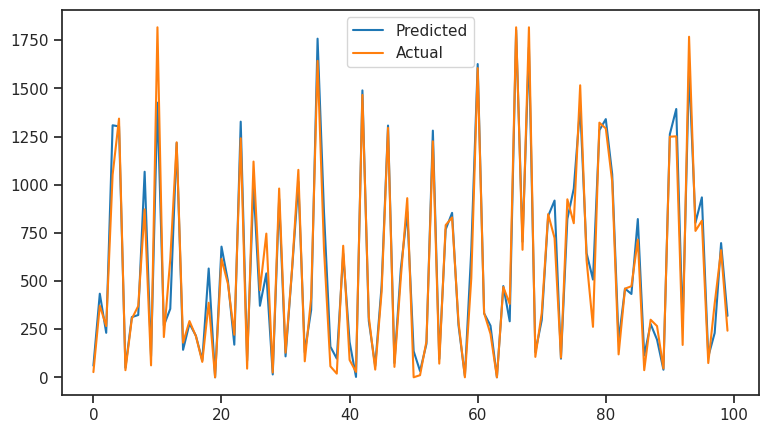

    ====================  RandomForest ====================


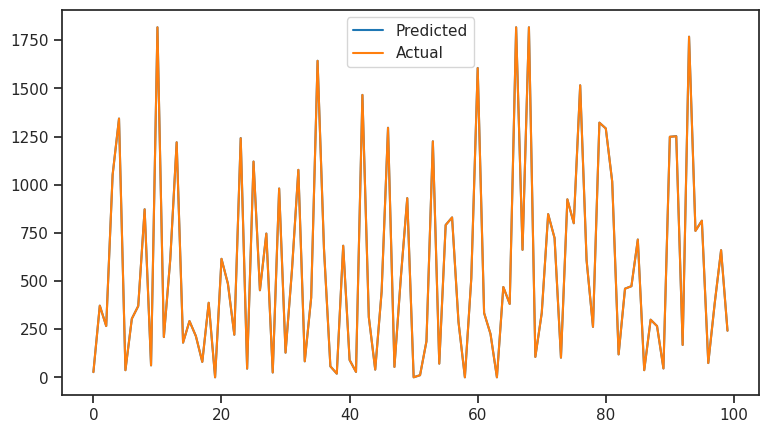

    ====================  Gradient Boosting ====================


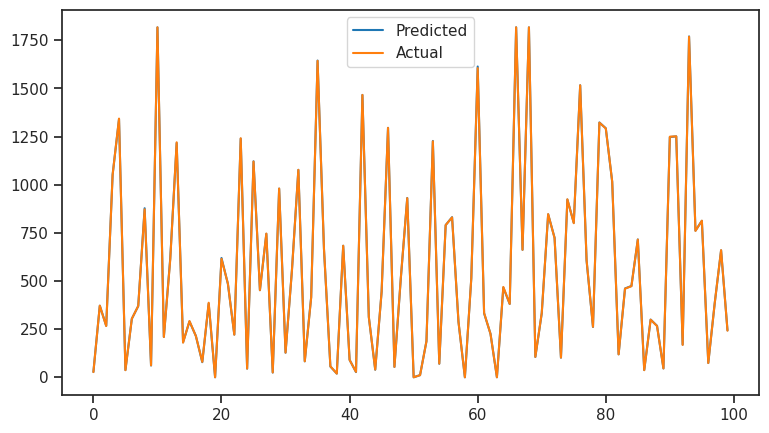

    ====================  XGBoost Regression ====================


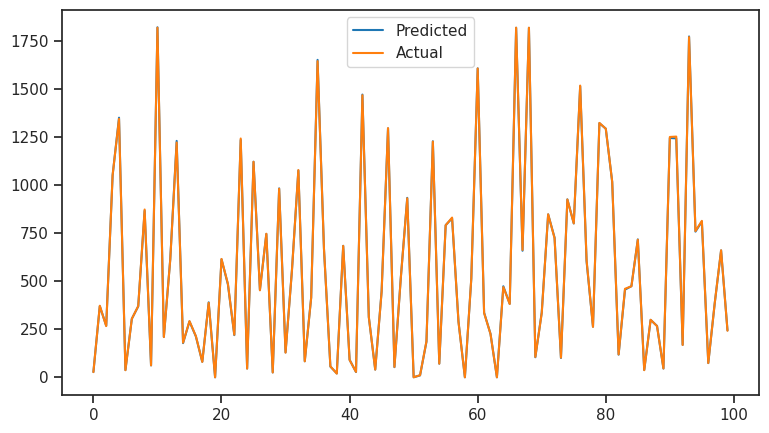

In [102]:
#running the models and getting the scores
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model_score = []

for name, model in model1:
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_value = mean_squared_error(y_test, y_pred)  # Calculate MSE using sklearn's function
    model_data["MSE"] = mse_value
    model_data["RMSE"] = np.sqrt(mse_value)
    model_data["R2_Score"] = r2_score(y_test, y_pred)  # Calculate R2 score using sklearn's function
    n = X_test.shape[0]
    p = X_test.shape[1]
    model_data["ADJ_R2"] = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))

    print(f'    {20 * "="}  {name} {20 * "="}')
    plt.figure(figsize=(9, 5))
    plt.plot(y_pred[:100])
    plt.plot(np.array(y_test)[:100])
    plt.legend(["Predicted", "Actual"])
    plt.show()
    model_score.append(model_data)

In [103]:
# Create a DataFrame from the list of model scores
model1_df = pd.DataFrame(model_score)
model1_df

Name       MSE    RMSE  R2_Score  ADJ_R2
0    Linear Regression 14104.457 118.762     0.955   0.954
1                Ridge 14104.515 118.762     0.955   0.954
2                Lasso 14109.986 118.785     0.955   0.954
3  KNeighborsRegressor 14228.205 119.282     0.954   0.954
4         RandomForest     0.082   0.286     1.000   1.000
5    Gradient Boosting     2.974   1.725     1.000   1.000
6   XGBoost Regression     8.070   2.841     1.000   1.000

In [104]:
# Sort the DataFrame by 'R2_Score' in descending order (highest R2_Score first)
sorted_model1_df=model1_df.sort_values(by=['R2_Score'], ascending = False)
print(sorted_model1_df)

                  Name       MSE    RMSE  R2_Score  ADJ_R2
4         RandomForest     0.082   0.286     1.000   1.000
5    Gradient Boosting     2.974   1.725     1.000   1.000
6   XGBoost Regression     8.070   2.841     1.000   1.000
0    Linear Regression 14104.457 118.762     0.955   0.954
1                Ridge 14104.515 118.762     0.955   0.954
2                Lasso 14109.986 118.785     0.955   0.954
3  KNeighborsRegressor 14228.205 119.282     0.954   0.954


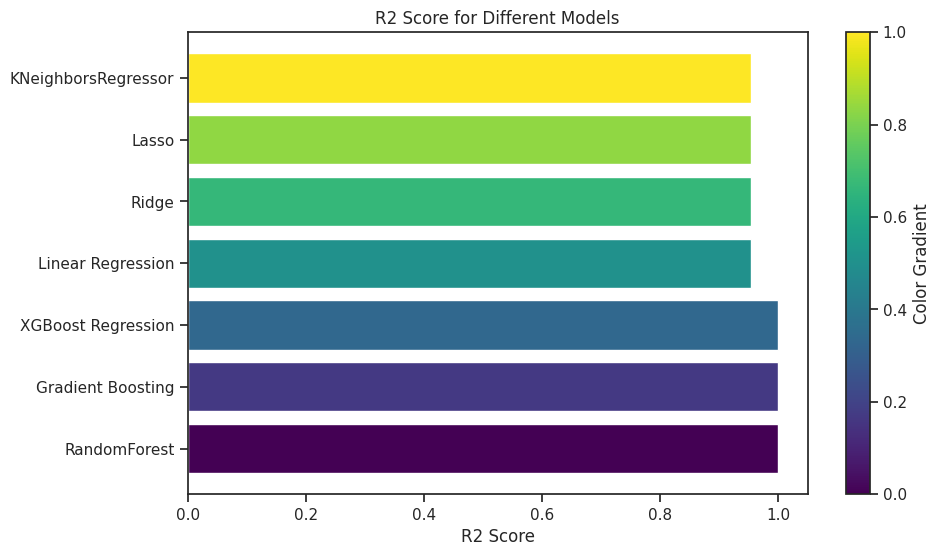

In [105]:
# Create a custom colormap with a gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_model1_df)))

# Create a bar plot with color gradients
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_model1_df['Name'], sorted_model1_df['R2_Score'], color=colors)

# Add labels and title
plt.xlabel('R2 Score')
plt.title('R2 Score for Different Models')

# Add a color bar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, 1))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color Gradient')

# Display the plot
plt.show()

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

It appears that the RandomForest model has the lowest MSE and RMSE and the highest R2 score, making it a strong candidate for the final prediction model.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used in our analysis is the Random Forest regression model. Random Forest is an ensemble learning technique that combines multiple decision trees to create a more robust and accurate model. It is a popular choice for both classification and regression tasks due to its ability to handle complex relationships between features and make accurate predictions.

Here's how the Random Forest model works:

**Ensemble of Decision Trees:** Random Forest consists of a collection of decision trees. Each decision tree is trained on a random subset of the data (bootstrapping) and a random subset of features. This introduces randomness and diversity into the individual trees.

**Voting:** For regression tasks, the final prediction is often the average (or majority vote) of the predictions made by individual trees. This ensemble approach helps reduce overfitting and increases model generalization.

**Feature Importance:** Random Forest provides a measure of feature importance. It calculates how much each feature contributes to the reduction in the mean squared error when making predictions. This information is valuable for understanding which features are most influential in the model's predictions.

In [110]:
import shap

In [115]:
class ModelWrapper:
    def __init__(self, model):
        self.model = model

    def __call__(self, X):
        return self.model.predict(X)

# Create a callable wrapper for your RandomForestRegressor model
callable_model = ModelWrapper(random_forest_model)

# Initialize the explainer with the callable model
explainer = shap.Explainer(callable_model, X_train)

# **Conclusion**

we can draw several conclusions regarding bike rental demand:

Random Forest and XGBoost models shows promising result, therefore it can be used to solve this problem.

**Day of the Week:** Bike rental counts are higher on weekdays than on weekends. This suggests that people are more likely to use bikes for commuting or daily activities during the workweek, while on weekends, recreational bike usage might be more prevalent.

**Peak Hours:** The peak hours for bike rental demand occur in the morning (around 8-9 AM) and in the evening (around 6-7 PM). These times align with typical commuting hours, indicating that many people use bikes for their daily commute.

**Seasonal Variation:** Bike demand is higher in summer than in winter. This is expected, as more people are inclined to rent bikes when the weather is warm and pleasant. In contrast, cold winter weather may discourage bike usage.

**Weather Conditions:** Bike demand is higher on clear days compared to snowy or rainy days. People tend to avoid biking in inclement weather, which can be less safe and comfortable.

**Temperature Range:** The temperature range of 22 to 25°C is associated with higher bike rental demand. This indicates that mild and comfortable temperatures are preferable for bike riders. Extreme cold or hot weather may deter people from renting bikes.

**Relevant Features:** The features that influence bike demand include 'Hour,' 'Temperature(°C),' 'Humidity,' 'Wind_speed,' 'Visibility,' 'Dew_point_temperature,' 'Solar_Radiation,' 'Rainfall,' 'Snowfall,' 'Seasons,' 'Holiday,' 'month,' and 'day of the week.' These factors are essential for predicting and regulating bike rental demand.

Based on these conclusions, it would make sense to use machine learning models like Random Forest and XGBoost to predict bike rental demand, as they can effectively capture the relationships between these features and the demand for bike rentals. These models can help businesses optimize their bike rental services by forecasting demand and making data-driven decisions, such as adjusting the number of available bikes, pricing, and marketing strategies to meet the needs of their customers.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***